# Práctica de Laboratorio 2 — Análisis de Series Temporales

**Asignatura:** Análisis de Series Temporales  
**Curso:** 2025–2026  

**Autores:**  
Vanesa Gómez Martínez  
Cristian David Chushig Muzo  
Marius Marinescu  
Eva Milara Hernando  

**Afiliación:**  
Universidad Rey Juan Carlos  
Departamento de Teoría de la Señal y Comunicaciones y Sistemas Telemáticos y Computación  

## Objetivo general

Esta práctica aplica los conceptos del segundo bloque de la asignatura, centrados en:

- Análisis conjunto de ACF y PACF para modelos MA, AR y ARMA.
- Estudio de invertibilidad (MA) y causalidad/estacionariedad (AR) mediante raíces de polinomios.
- Estimación de parámetros AR mediante ecuaciones de Yule–Walker.
- Aplicación completa de la metodología Box–Jenkins (identificación, estimación y diagnóstico) con datos reales.

El cuaderno combina simulación, visualización e interpretación estadística, y está pensado como material docente en acceso abierto.

---

## Estructura

1. ACF y PACF en modelos MA, AR y ARMA  
2. Invertibilidad y causalidad  
3. Ecuaciones de Yule–Walker (AR(3))  
4. Metodología Box–Jenkins (serie real + SARIMA)

---


## 1. Análisis de ACF y PACF para series MA, AR y ARMA

**Objetivos**
- Representar conjuntamente ACF y PACF y usar sus patrones para proponer órdenes (p, q).
- Comparar la “dualidad” MA ↔ AR (corte vs decaimiento) en distintos ejemplos.
- Analizar cómo cambia ACF/PACF en AR(1) al variar el signo y magnitud del coeficiente.

**Qué vamos a hacer:** Simularemos procesos MA/AR/ARMA (500 muestras) y observaremos patrones característicos en ACF y PACF.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf, pacf, pacf_yw

In [ ]:
def plot_acf_pacf(data, lags=20, title="Serie de Tiempo"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=axes[0])
    axes[0].set_title(f"ACF - {title}")
    sm.graphics.tsa.plot_pacf(data, lags=lags, ax=axes[1])
    axes[1].set_title(f"PACF - {title}")
    plt.tight_layout()
    plt.show()

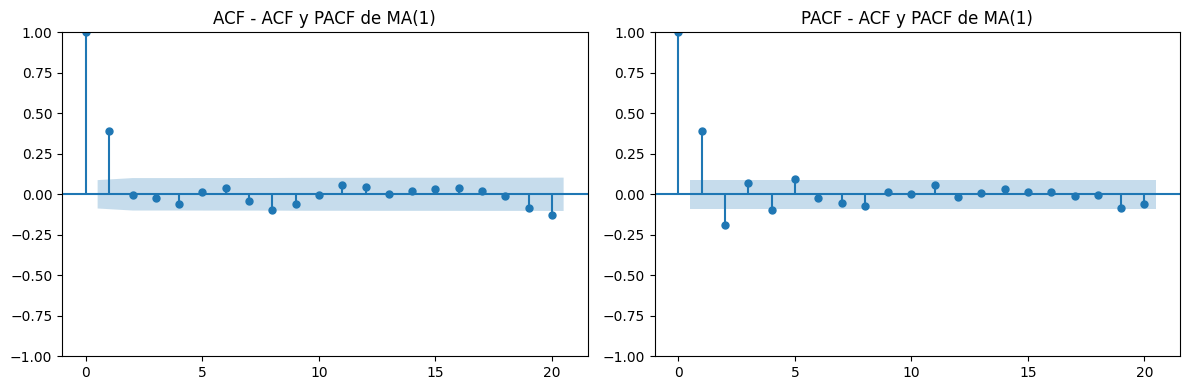

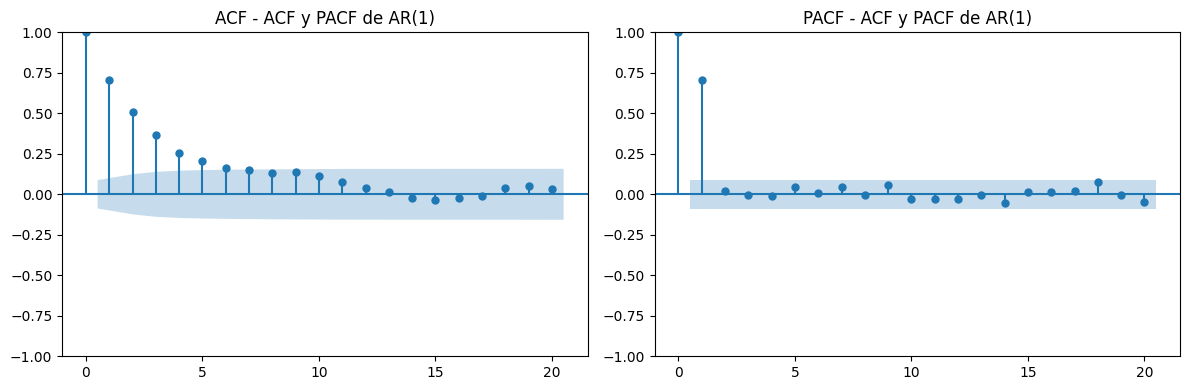

In [ ]:
# Parámetros de modelos
np.random.seed(42)
n = 500  # Número de observaciones

# Modelo MA(1): X_t = Z_t + 0.5 * Z_{t-1}
ma1 = ArmaProcess(ar=[1], ma=[1, 0.5]).generate_sample(nsample=n)
plot_acf_pacf(ma1, title="ACF y PACF de MA(1)")

# Modelo AR(1): X_t = 0.7 * X_{t-1} + Z_t
ar1 = ArmaProcess(ar=[1, -0.7], ma=[1]).generate_sample(nsample=n)
plot_acf_pacf(ar1, title="ACF y PACF de AR(1)")

**Interpretación de las Figuras (MA(1) vs AR(1))**

- **MA(1)**: se espera que la **ACF** muestre un pico significativo en **lag 1** y que, a partir de ahí, las correlaciones sean cercanas a 0 (corte en q=1). La **PACF** suele decaer gradualmente.
- **AR(1)**: se espera el patrón inverso: la **PACF** presenta un pico dominante en **lag 1** (corte en p=1) y la **ACF** decae de forma aproximadamente exponencial.

Esta “dualidad” (corte en ACF para MA, corte en PACF para AR) es la base de la identificación inicial de órdenes.


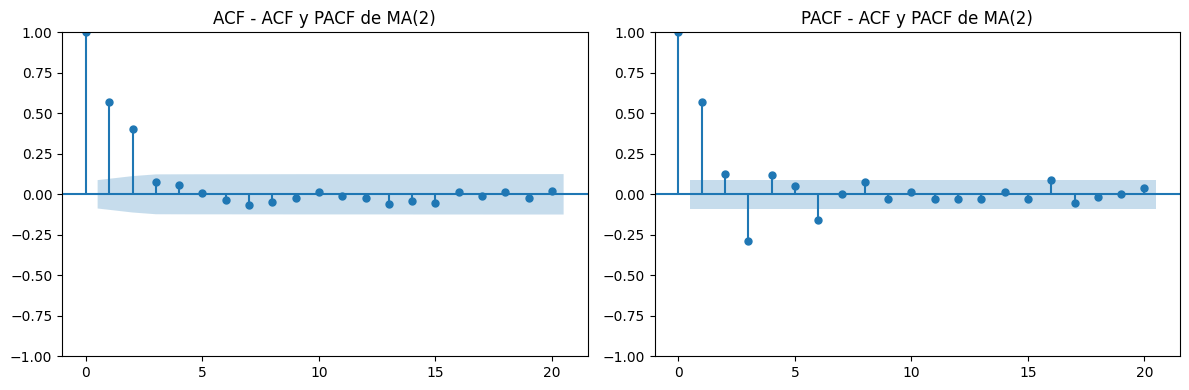

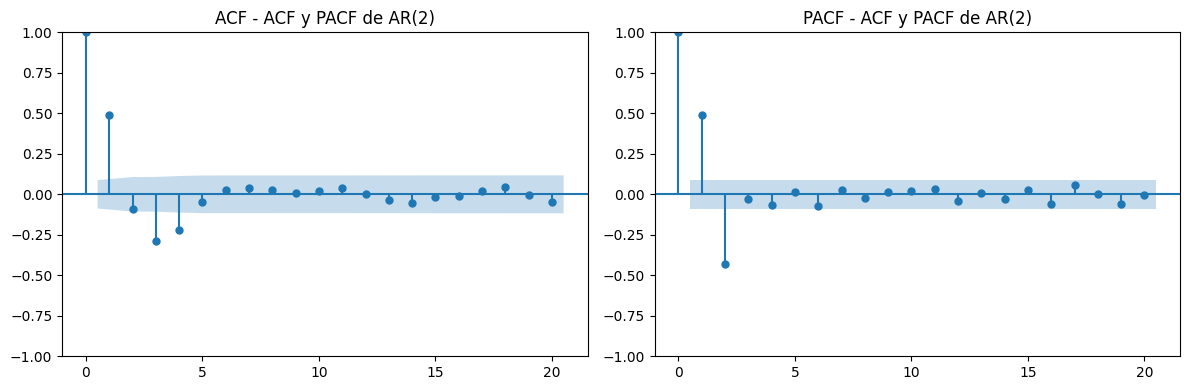

Observa cómo la ACF de MA(2) se corta después del rezago 2 y la PACF de AR(2) después del rezago 2.


In [ ]:
# Modelo MA(2): X_t = Z_t + 0.6 * Z_{t-1} + 0.4 * Z_{t-2}
ma2 = ArmaProcess(ar=[1], ma=[1, 0.6, 0.6]).generate_sample(nsample=n)
plot_acf_pacf(ma2, title="ACF y PACF de MA(2)")

# Modelo AR(2): X_t = 0.7 * X_{t-1} - 0.4 * X_{t-2} + Z_t
ar2 = ArmaProcess(ar=[1, -0.7, 0.4], ma=[1]).generate_sample(nsample=n)
plot_acf_pacf(ar2, title="ACF y PACF de AR(2)")

# Comparación adicional de dualidad
print("Observa cómo la ACF de MA(2) se corta después del rezago 2 y la PACF de AR(2) después del rezago 2.")

**Interpretación de las Figuras (MA(2) y AR(2))**

- En **MA(2)** la memoria está limitada a 2 innovaciones: la **ACF** debería ser relevante hasta **lag 2** y después cortarse.
- En **AR(2)** la dependencia directa llega hasta el orden p: la **PACF** debería mostrar picos relevantes hasta **lag 2**, mientras que la ACF decae gradualmente.

Comprueba que los “cortes” aparecen justo en el orden teórico del modelo simulado.


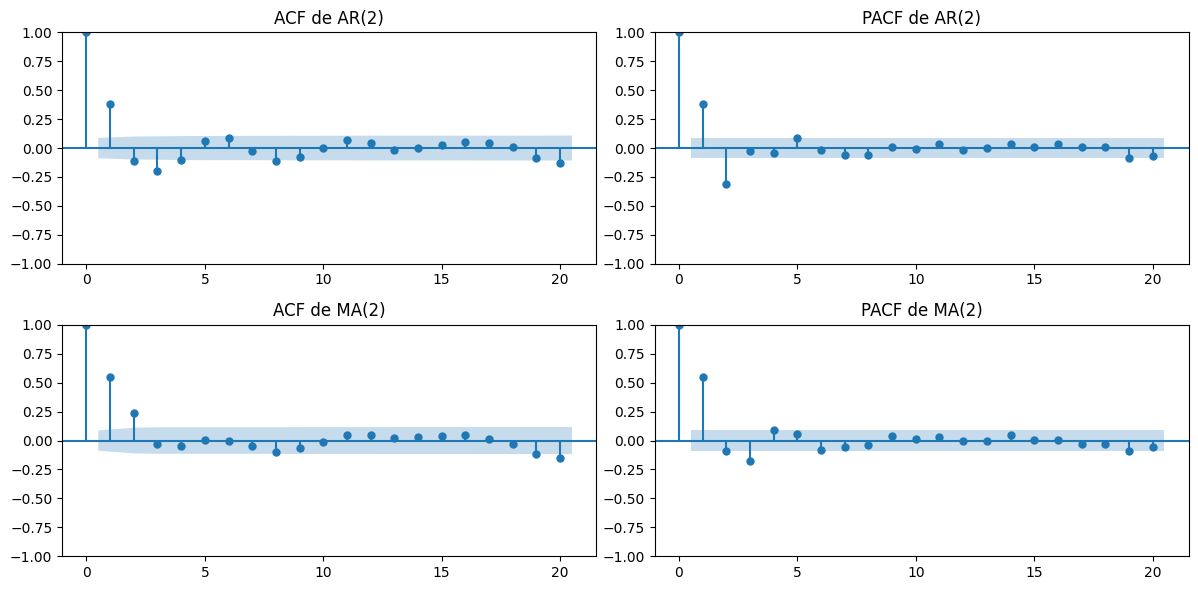

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

# Definir el proceso AR(2): X_t = 0.5*X_{t-1} - 0.3*X_{t-2} + e_t
ar_params = np.array([1, -0.5, 0.3])  # Coeficientes con signo cambiado
ma_params = np.array([1])  # Solo ruido blanco
ar_process = ArmaProcess(ar_params, ma_params)
np.random.seed(42)
series_ar2 = ar_process.generate_sample(nsample=500)

# Definir el proceso MA(2): X_t = e_t + 0.6*e_{t-1} + 0.4*e_{t-2}
ar_params = np.array([1])  # Solo ruido blanco
ma_params = np.array([1, 0.6, 0.4])
ma_process = ArmaProcess(ar_params, ma_params)
np.random.seed(42)
series_ma2 = ma_process.generate_sample(nsample=500)

# Graficar ACF y PACF
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# AR(2) - ACF y PACF
sm.graphics.tsa.plot_acf(series_ar2, lags=20, ax=axes[0, 0])
axes[0, 0].set_title("ACF de AR(2)")
sm.graphics.tsa.plot_pacf(series_ar2, lags=20, ax=axes[0, 1])
axes[0, 1].set_title("PACF de AR(2)")

# MA(2) - ACF y PACF
sm.graphics.tsa.plot_acf(series_ma2, lags=20, ax=axes[1, 0])
axes[1, 0].set_title("ACF de MA(2)")
sm.graphics.tsa.plot_pacf(series_ma2, lags=20, ax=axes[1, 1])
axes[1, 1].set_title("PACF de MA(2)")

plt.tight_layout()
plt.show()


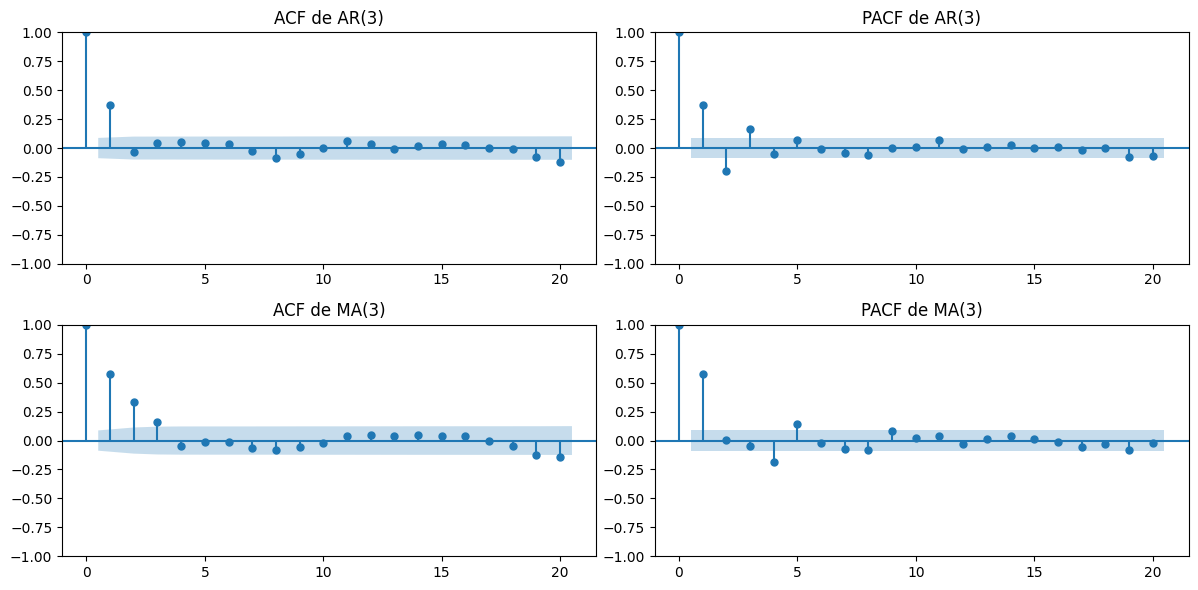

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

# Definir el proceso AR(3): X_t = 0.5*X_{t-1} - 0.3*X_{t-2} + 0.2*X_{t-3} + e_t
ar_params = np.array([1, -0.5, 0.3, -0.2])  # Coeficientes con signo cambiado
ma_params = np.array([1])  # Solo ruido blanco
ar_process = ArmaProcess(ar_params, ma_params)
np.random.seed(42)
series_ar3 = ar_process.generate_sample(nsample=500)

# Definir el proceso MA(3): X_t = e_t + 0.6*e_{t-1} + 0.3*e_{t-2} + 0.2*e_{t-3}
ar_params = np.array([1])  # Solo ruido blanco
ma_params = np.array([1, 0.6, 0.4, 0.3])
ma_process = ArmaProcess(ar_params, ma_params)
np.random.seed(42)
series_ma3 = ma_process.generate_sample(nsample=500)

# Graficar ACF y PACF
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# AR(3) - ACF y PACF
sm.graphics.tsa.plot_acf(series_ar3, lags=20, ax=axes[0, 0])
axes[0, 0].set_title("ACF de AR(3)")
sm.graphics.tsa.plot_pacf(series_ar3, lags=20, ax=axes[0, 1])
axes[0, 1].set_title("PACF de AR(3)")

# MA(3) - ACF y PACF
sm.graphics.tsa.plot_acf(series_ma3, lags=20, ax=axes[1, 0])
axes[1, 0].set_title("ACF de MA(3)")
sm.graphics.tsa.plot_pacf(series_ma3, lags=20, ax=axes[1, 1])
axes[1, 1].set_title("PACF de MA(3)")

plt.tight_layout()
plt.show()


1. Análisis de función de autocorrelación (ACF) y función de autocorrelación parcial (PACF) en series temporales MA, AR, y ARMA

In [ ]:
# Proceso AR(1): X_t = 0.8 X_{t-1} + e_t
aar_params = np.array([0.8])
ma_params = np.array([0])
AR_object = ArmaProcess(np.r_[1, -aar_params], np.r_[1, ma_params])
data_ar = AR_object.generate_sample(nsample=200)

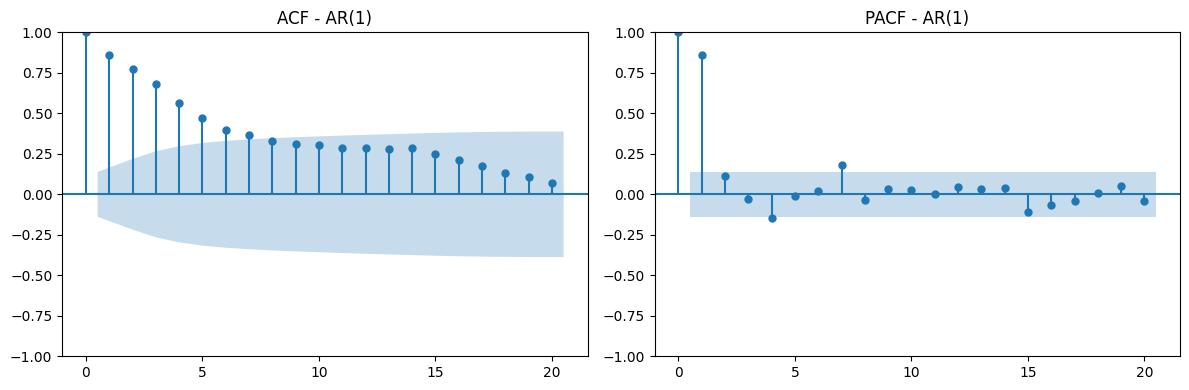

In [ ]:
plot_acf_pacf(data_ar, title="AR(1)")

In [ ]:
# Proceso AR(1): X_t = 0.7 X_{t-1} + e_t
aar_params = np.array([0.7])
ma_params = np.array([0])
AR_object = ArmaProcess(np.r_[1, -aar_params], np.r_[1, ma_params])
data_ar = AR_object.generate_sample(nsample=200)


AR(1) con coeficiente 0.2


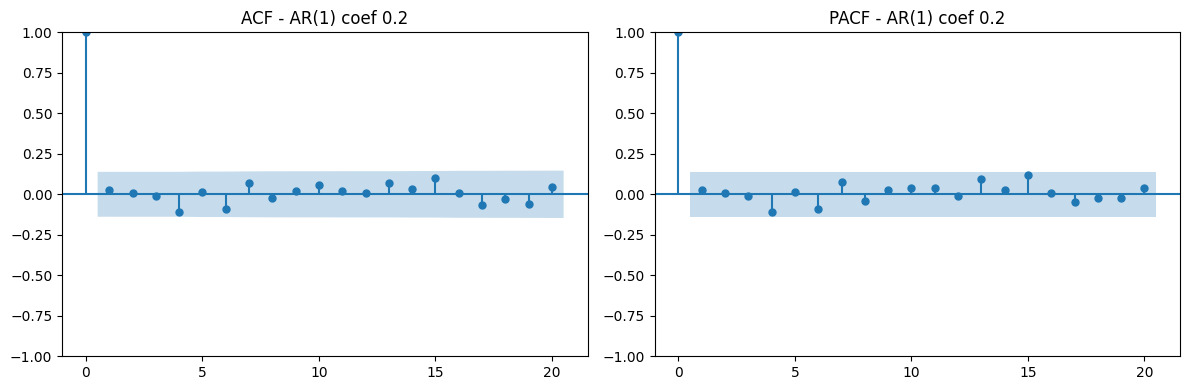


AR(1) con coeficiente 0.5


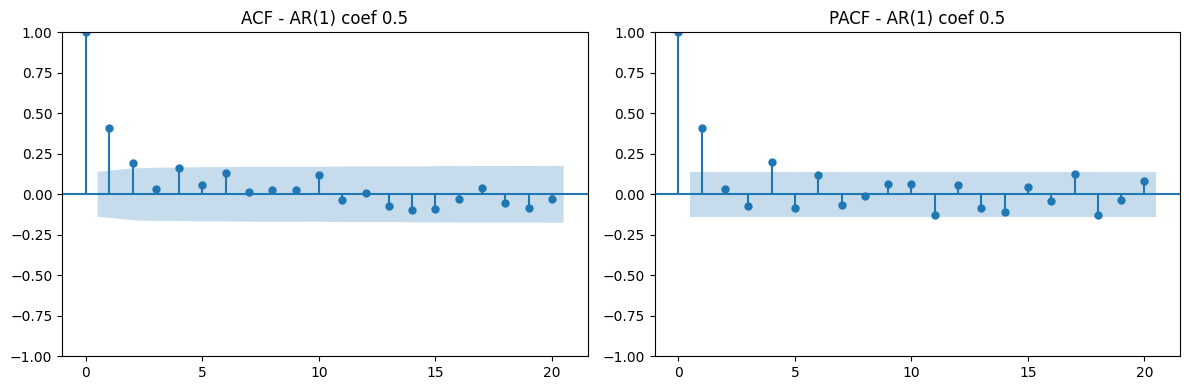


AR(1) con coeficiente 0.7


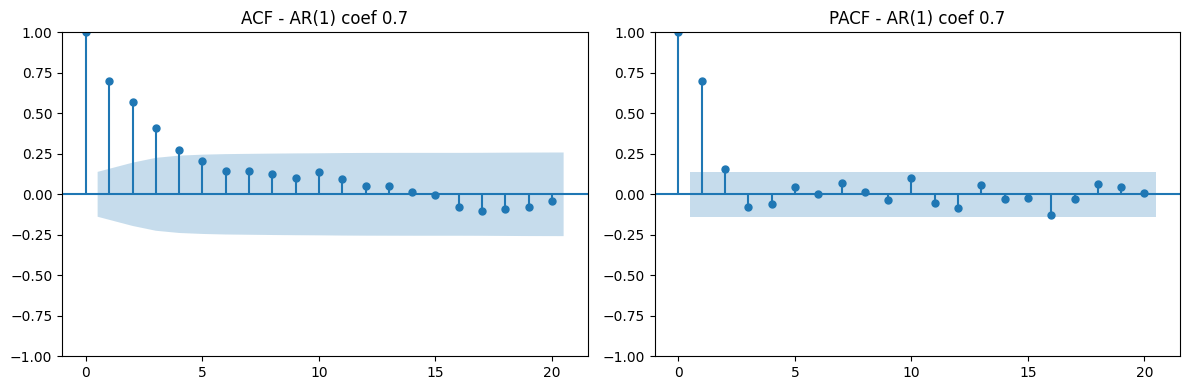


AR(1) con coeficiente 0.9


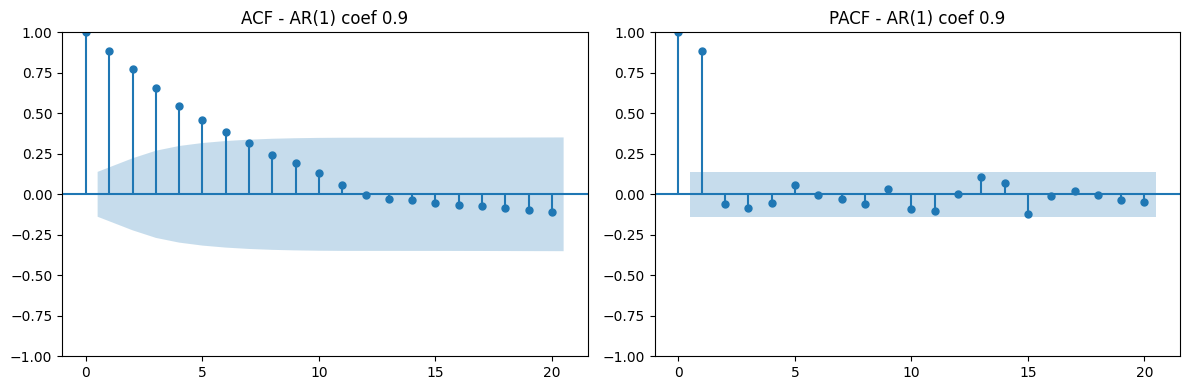

In [ ]:
coefficients = [0.2, 0.5, 0.7, 0.9]
n_samples = 200
for coef in coefficients:
    ar_params = np.array([coef])
    ma_params = np.array([0])
    AR_object = ArmaProcess(np.r_[1, -ar_params], np.r_[1, ma_params])
    data_ar = AR_object.generate_sample(nsample=n_samples)

    print(f"\nAR(1) con coeficiente {coef}")
    plot_acf_pacf(data_ar, title=f"AR(1) coef {coef}")


AR(1) con coeficiente 0.1


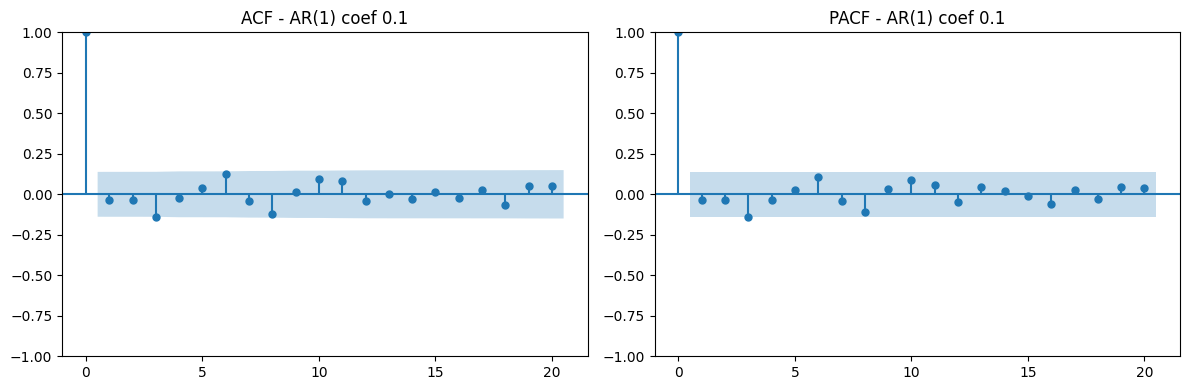


AR(1) con coeficiente 0.2


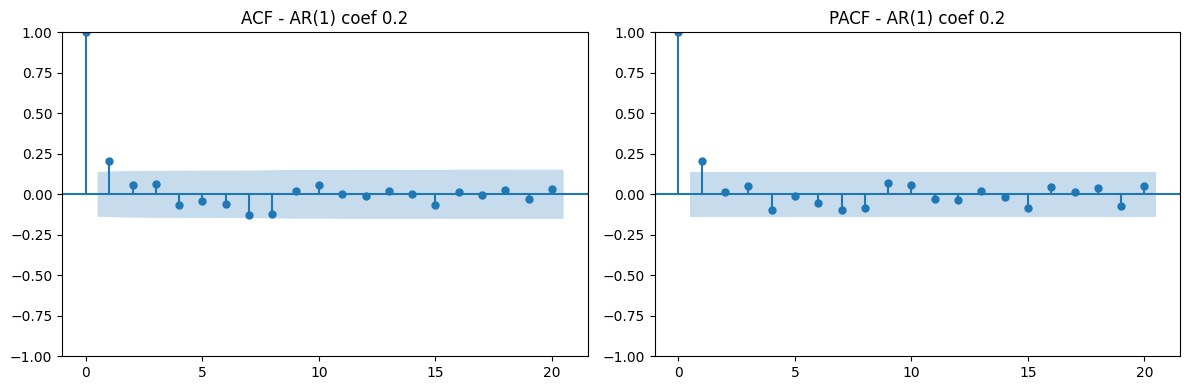


AR(1) con coeficiente 0.3


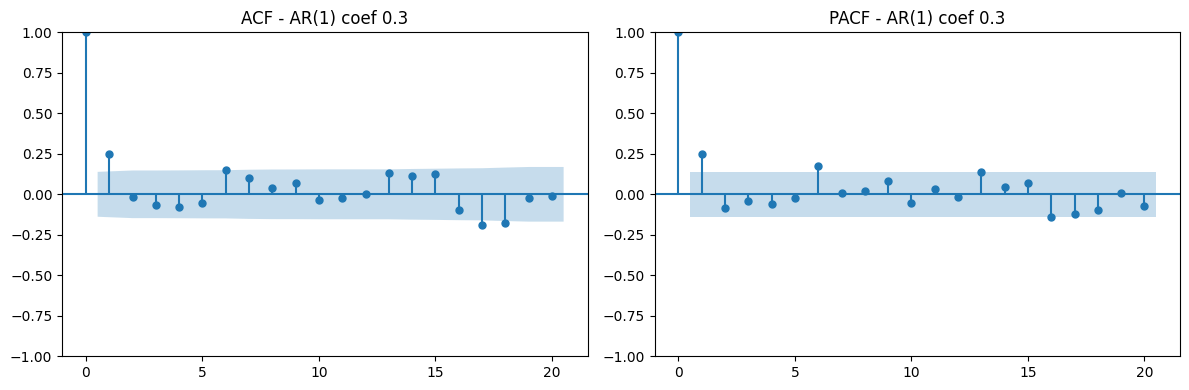


AR(1) con coeficiente 0.4


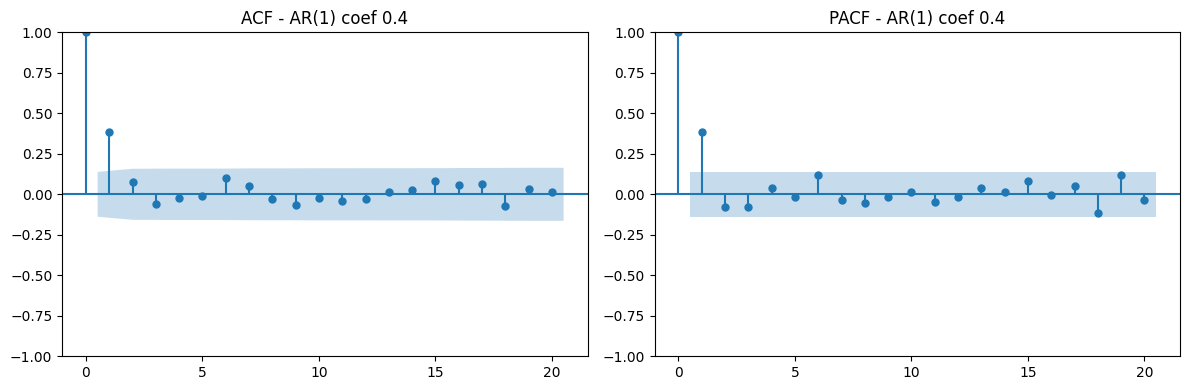


AR(1) con coeficiente 0.45


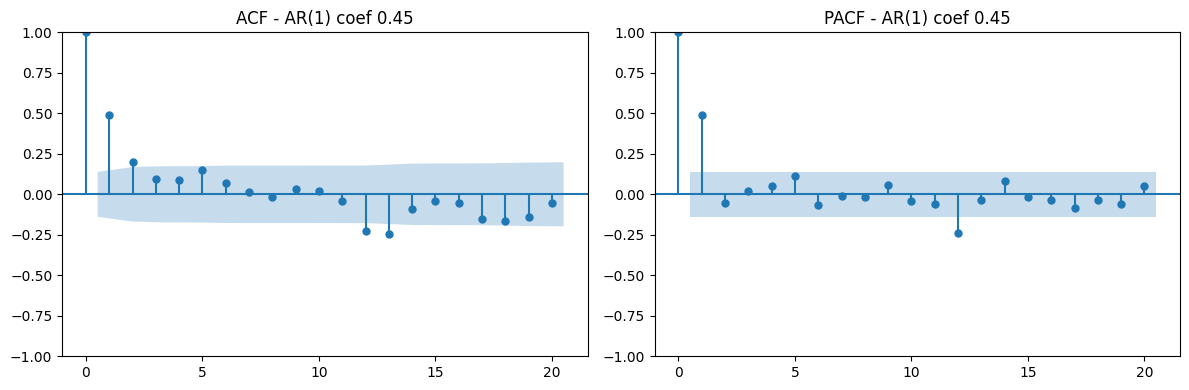

In [ ]:
# Valores de coeficientes entre 0.0 y 0.5
coefficients = [0.1, 0.2, 0.3, 0.4, 0.45]
n_samples = 200
for coef in coefficients:
    ar_params = np.array([coef])
    ma_params = np.array([0])
    AR_object = ArmaProcess(np.r_[1, -ar_params], np.r_[1, ma_params])
    data_ar = AR_object.generate_sample(nsample=n_samples)

    print(f"\nAR(1) con coeficiente {coef}")
    plot_acf_pacf(data_ar, title=f"AR(1) coef {coef}")

**Interpretación (AR(1) con coeficientes positivos pequeños)**

Al aumentar \(\phi\) desde valores bajos, la **ACF** decae más lentamente: la serie “recuerda” más su pasado.
La **PACF** mantiene un pico principal en **lag 1** (característico de AR(1)), mientras la magnitud de ese pico y la persistencia aumentan con \(|\phi|\).



AR(1) con coeficiente -0.1


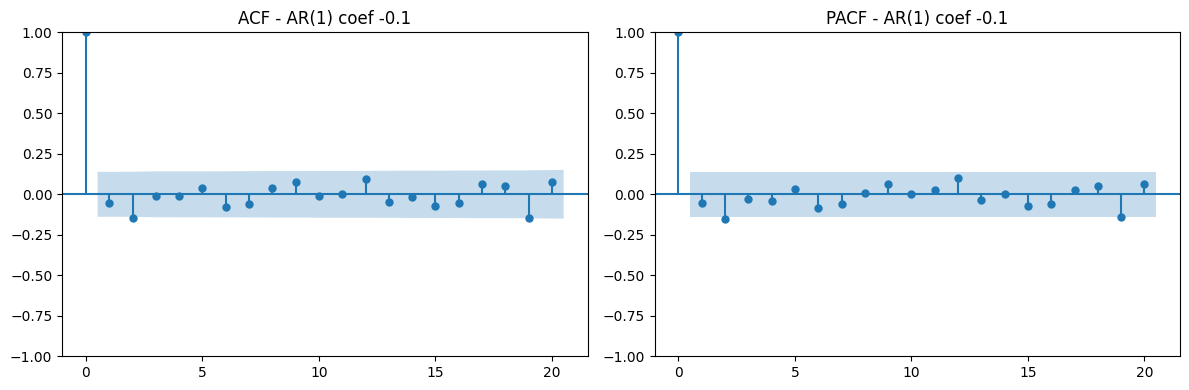


AR(1) con coeficiente -0.2


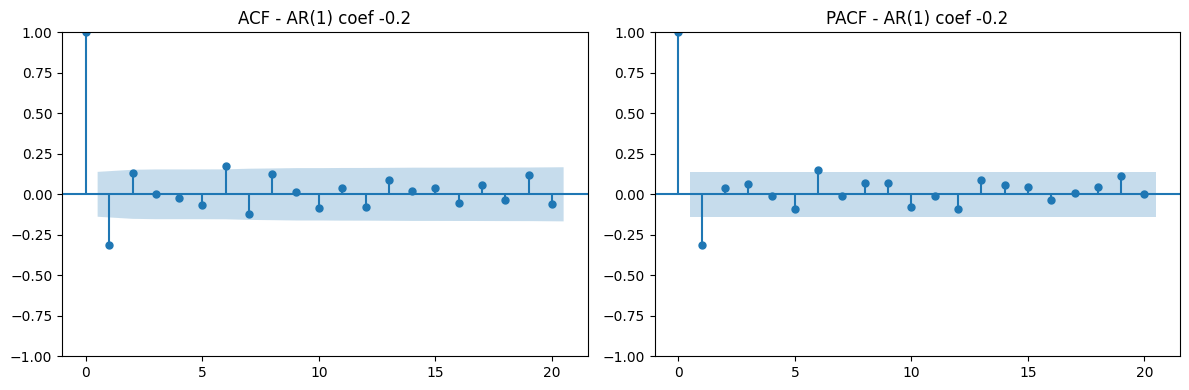


AR(1) con coeficiente -0.3


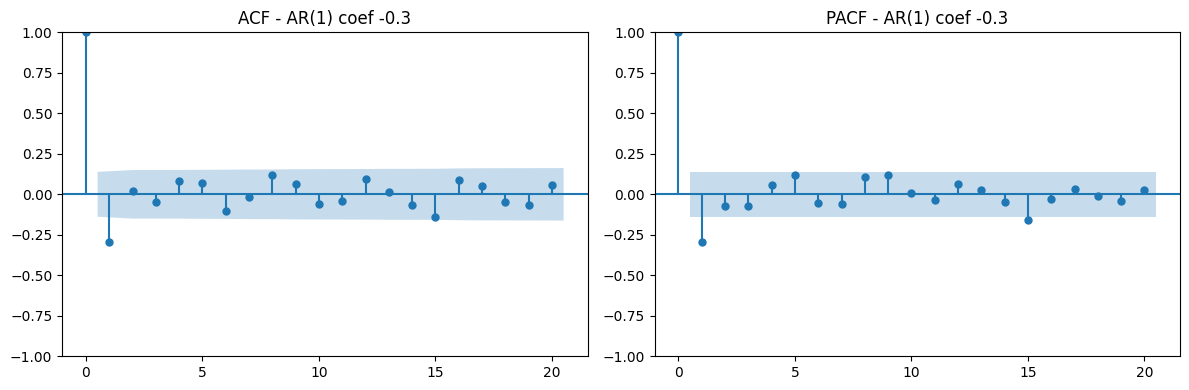


AR(1) con coeficiente -0.4


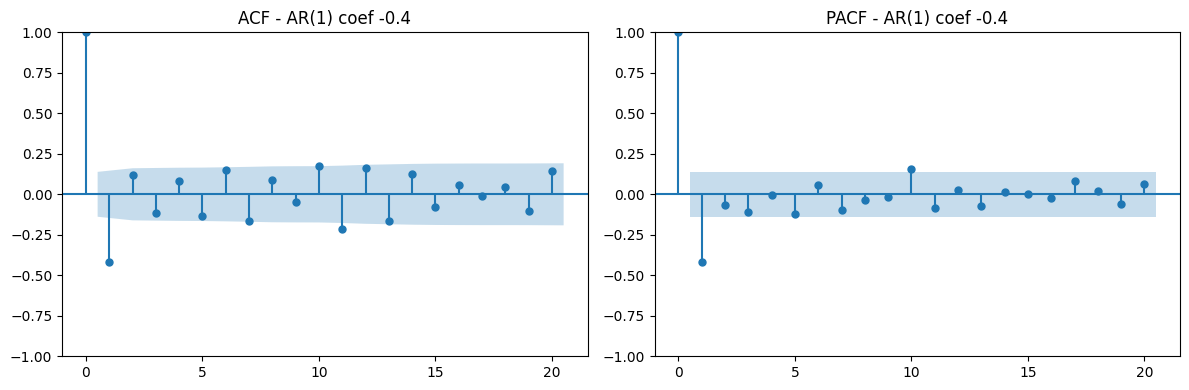


AR(1) con coeficiente -0.45


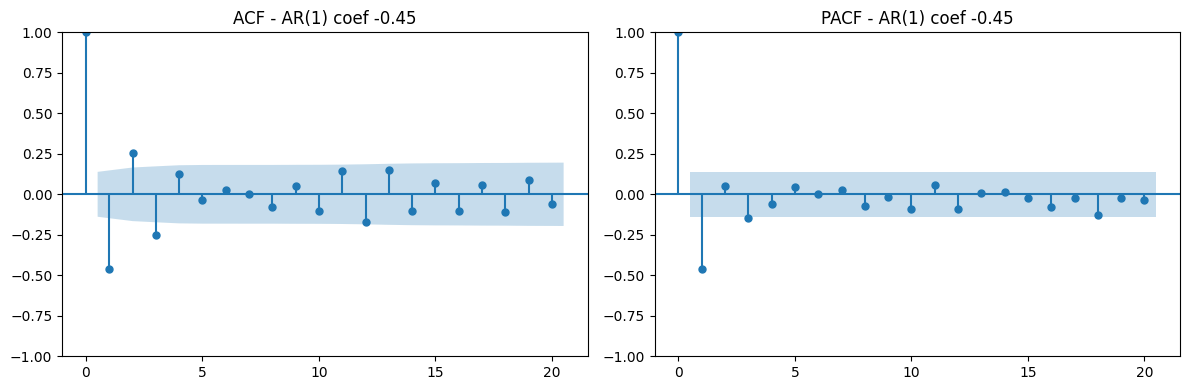

In [ ]:
# Valores de coeficientes entre 0.0 y 0.5
coefficients = [-0.1, -0.2, -0.3, -0.4, -0.45]
n_samples = 200
for coef in coefficients:
    ar_params = np.array([coef])
    ma_params = np.array([0])
    AR_object = ArmaProcess(np.r_[1, -ar_params], np.r_[1, ma_params])
    data_ar = AR_object.generate_sample(nsample=n_samples)

    print(f"\nAR(1) con coeficiente {coef}")
    plot_acf_pacf(data_ar, title=f"AR(1) coef {coef}")

**Interpretación (AR(1) con coeficientes negativos pequeños)**

Con \(\phi<0\) suele observarse **alternancia de signos** en la ACF (correlaciones positivas/negativas en lags consecutivos), reflejando oscilaciones.
Cuanto mayor es \(|\phi|\), más persistente es esa oscilación (decaimiento más lento en magnitud).



AR(1) con coeficiente 0.5


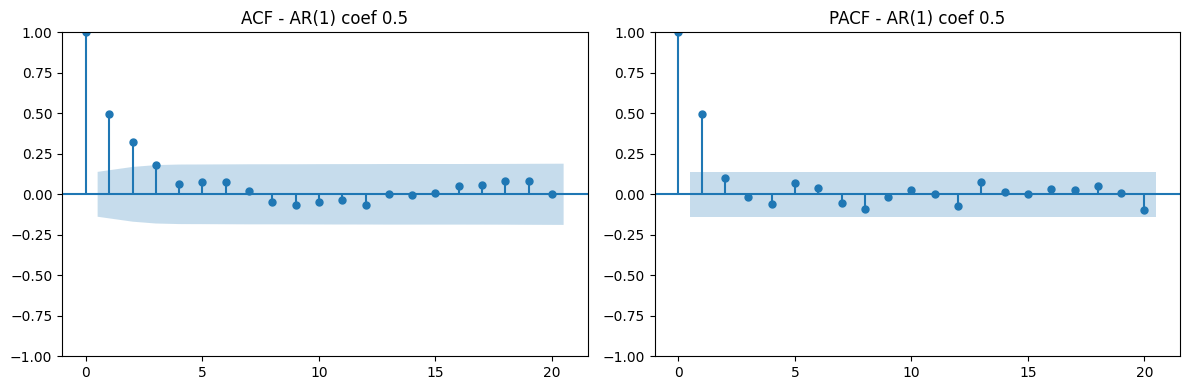


AR(1) con coeficiente 0.6


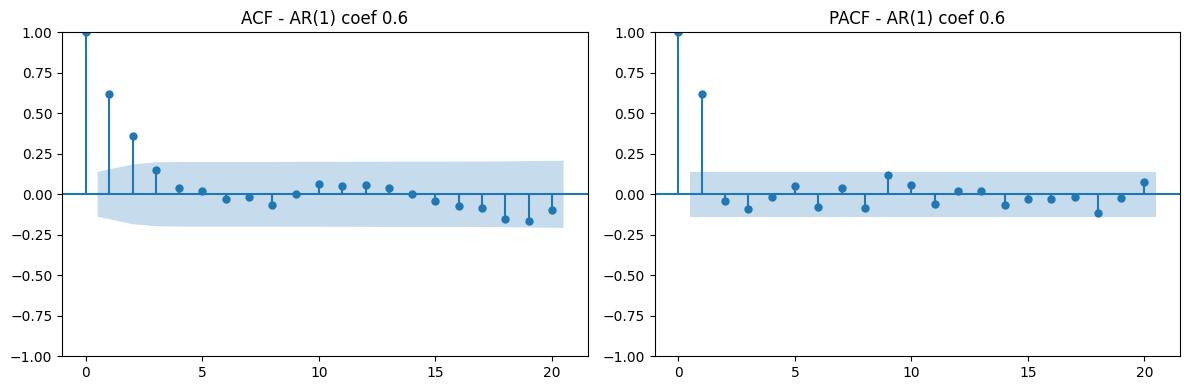


AR(1) con coeficiente 0.7


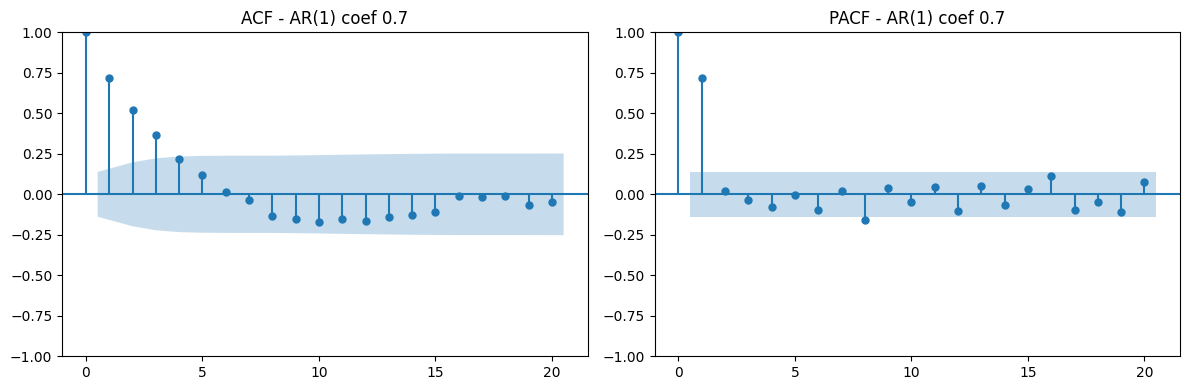


AR(1) con coeficiente 0.8


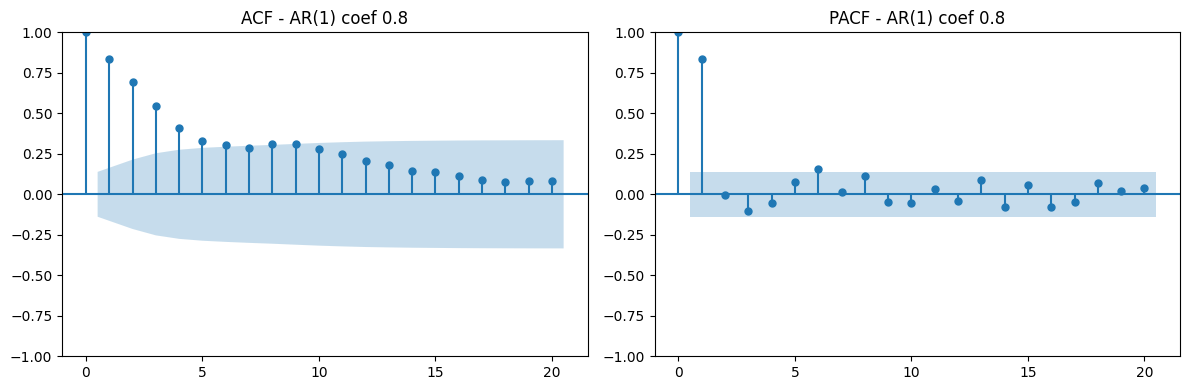


AR(1) con coeficiente 0.9


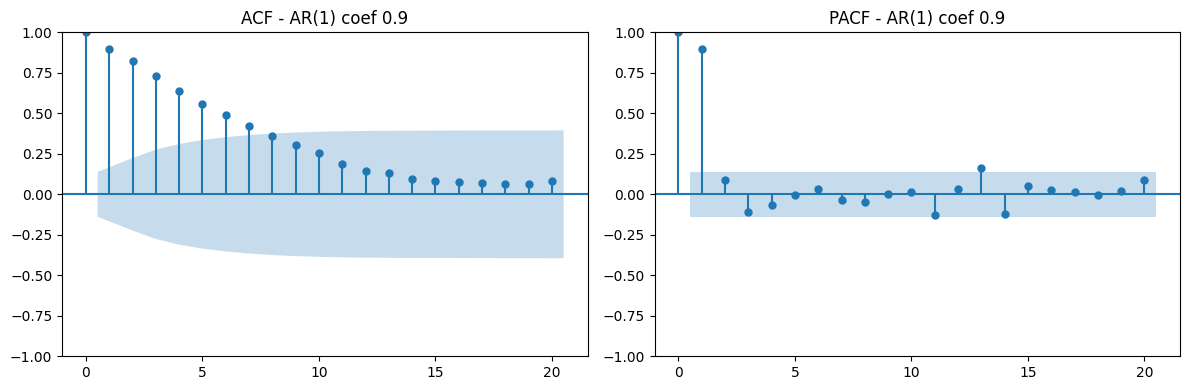

In [ ]:
coefficients = [0.5, 0.6, 0.7, 0.8, 0.9]
n_samples = 200
for coef in coefficients:
    ar_params = np.array([coef])
    ma_params = np.array([0])
    AR_object = ArmaProcess(np.r_[1, -ar_params], np.r_[1, ma_params])
    data_ar = AR_object.generate_sample(nsample=n_samples)

    print(f"\nAR(1) con coeficiente {coef}")
    plot_acf_pacf(data_ar, title=f"AR(1) coef {coef}")

**Interpretación (AR(1) con coeficientes positivos grandes)**

Cuando \(\phi\) se acerca a 1, la ACF decae muy lentamente (alta persistencia) y el proceso se aproxima a un comportamiento cercano a “raíz unitaria”.
Aunque siga siendo estacionario si \(|\phi|<1\), en la práctica requiere más muestras para que la dependencia se “apague”.



AR(1) con coeficiente -0.5


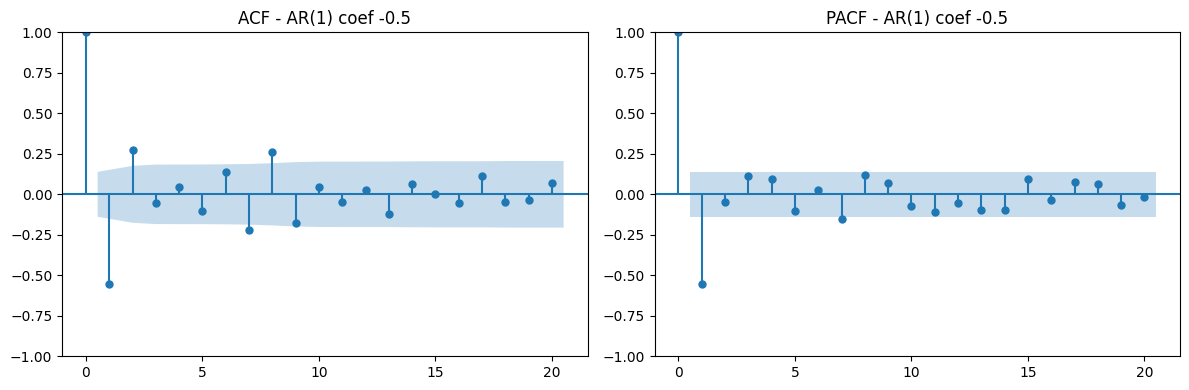


AR(1) con coeficiente -0.6


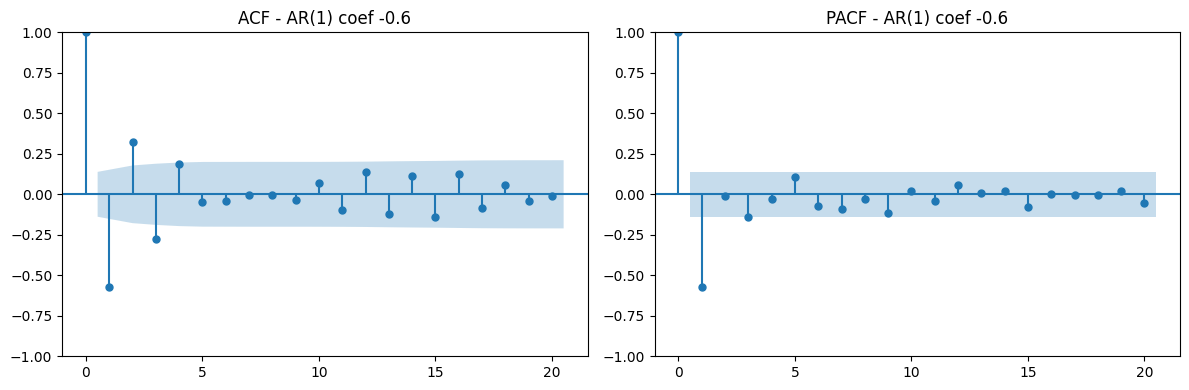


AR(1) con coeficiente -0.7


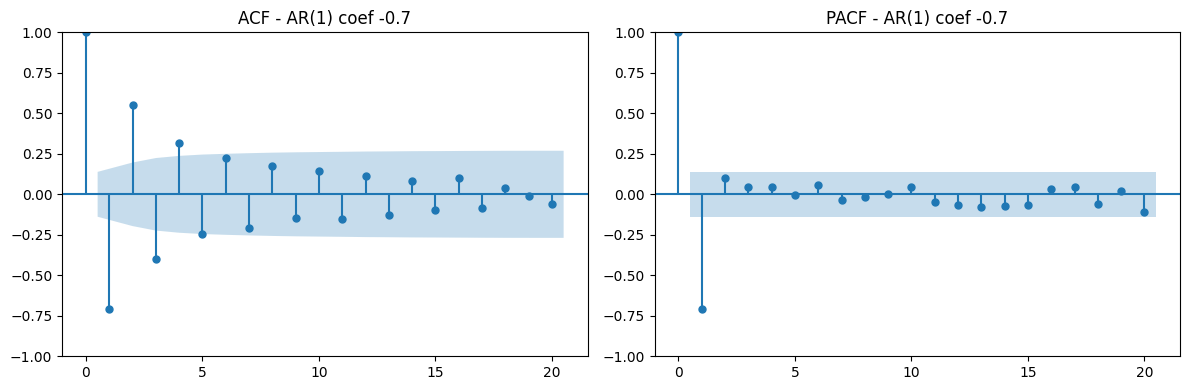


AR(1) con coeficiente -0.8


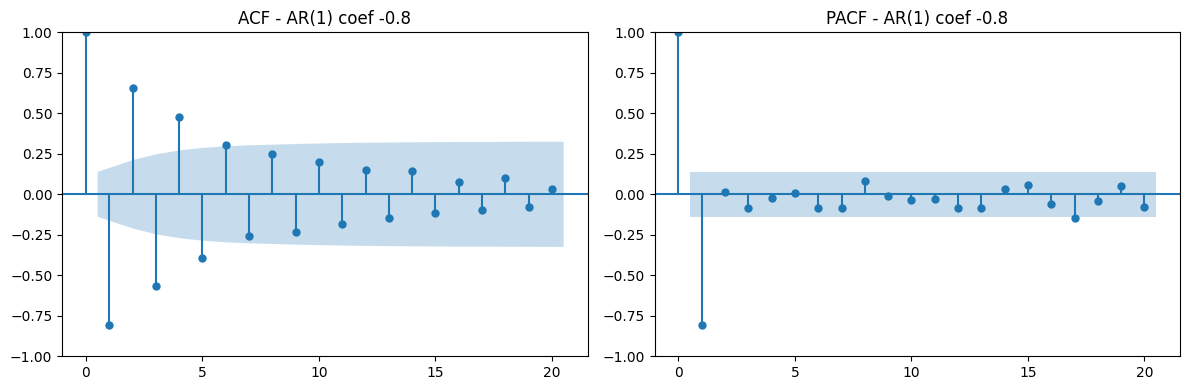


AR(1) con coeficiente -0.9


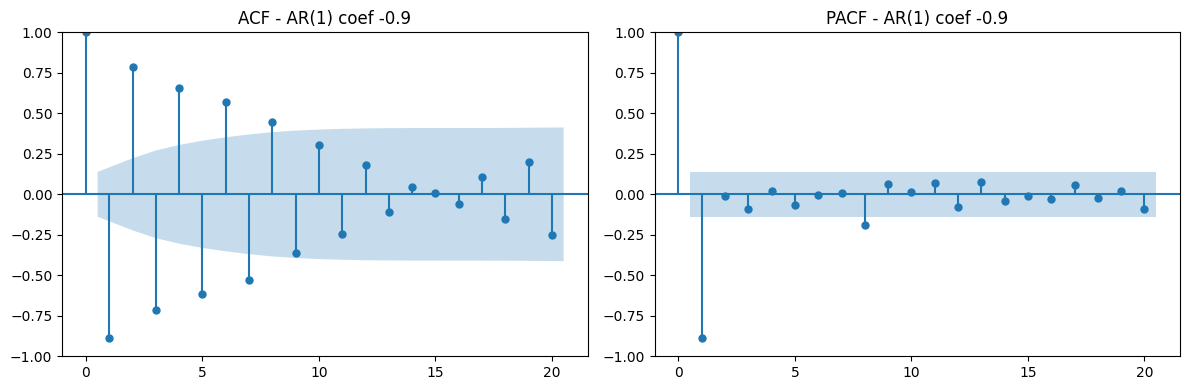

In [ ]:
coefficients = [-0.5, -0.6, -0.7, -0.8, -0.9]
n_samples = 200
for coef in coefficients:
    ar_params = np.array([coef])
    ma_params = np.array([0])
    AR_object = ArmaProcess(np.r_[1, -ar_params], np.r_[1, ma_params])
    data_ar = AR_object.generate_sample(nsample=n_samples)

    print(f"\nAR(1) con coeficiente {coef}")
    plot_acf_pacf(data_ar, title=f"AR(1) coef {coef}")

**Interpretación (AR(1) con coeficientes negativos grandes)**

Con \(\phi\) negativo y de gran magnitud, la ACF tiende a alternar signos y decaer lentamente en magnitud.
Este patrón combina **oscilación** + **alta persistencia**, y suele ser muy visible en los correlogramas.


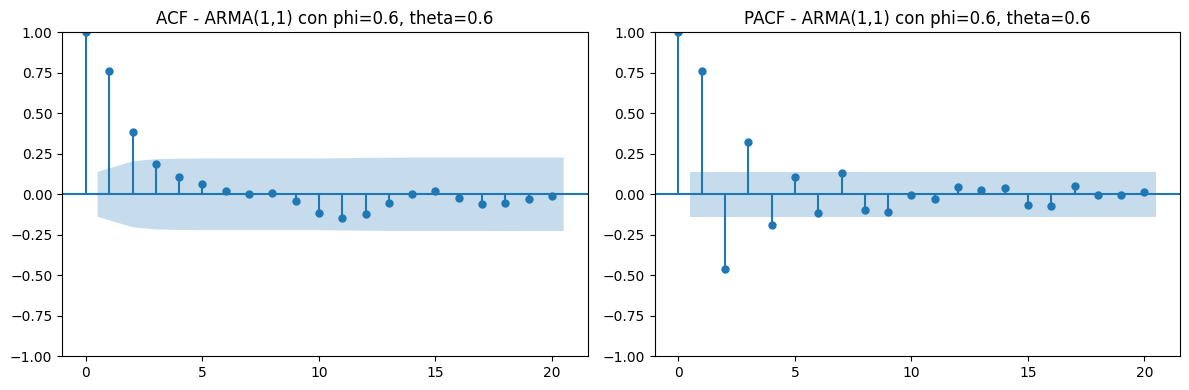

In [ ]:
# ARMA(1,1): X_t = 0.6 X_{t-1} + e_t + 0.6 e_{t-1}
n_samples = 200
ar_coef = 0.6
ma_coef = 0.6
ARMA_object = ArmaProcess(np.r_[1, -ar_params], np.r_[1, ma_params])
data_arma = ARMA_object.generate_sample(nsample=n_samples)
plot_acf_pacf(data_arma, title="ARMA(1,1) con phi=0.6, theta=0.6")

**Interpretación de las Figuras (ARMA)**

En procesos **ARMA(p,q)** es habitual que **ni la ACF ni la PACF se corten limpiamente**: ambas tienden a decaer sin un corte nítido.
Por ello, además de la inspección visual, la identificación suele apoyarse en criterios de información (AIC/BIC) y en diagnóstico de residuos.


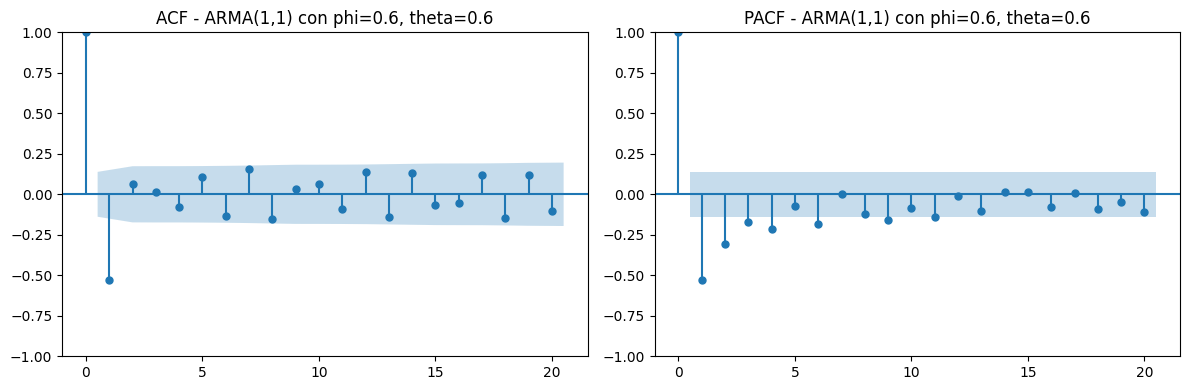

In [ ]:
ma_params = np.array([0.8])
ar_params = np.array([0])
ARMA_object = ArmaProcess(np.r_[1], np.r_[1, -ma_params])
data_arma = ARMA_object.generate_sample(nsample=n_samples)
plot_acf_pacf(data_arma, title="ARMA(1,1) con phi=0.6, theta=0.6")

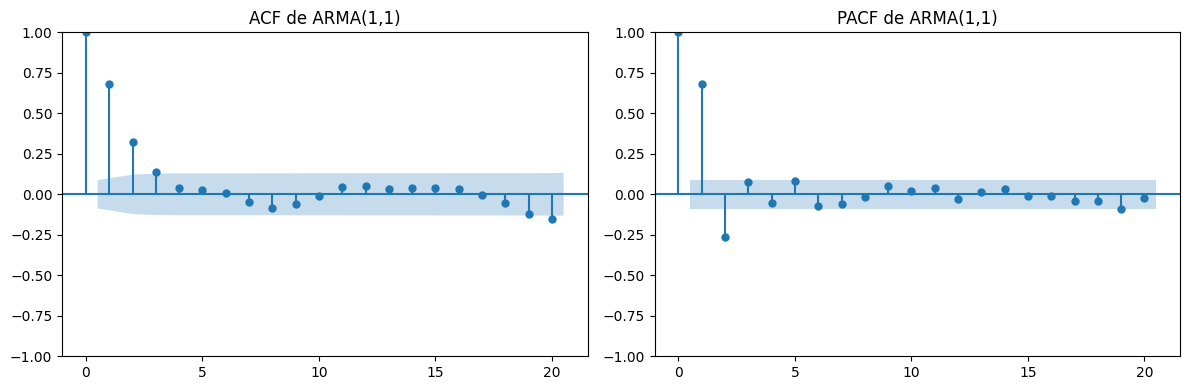

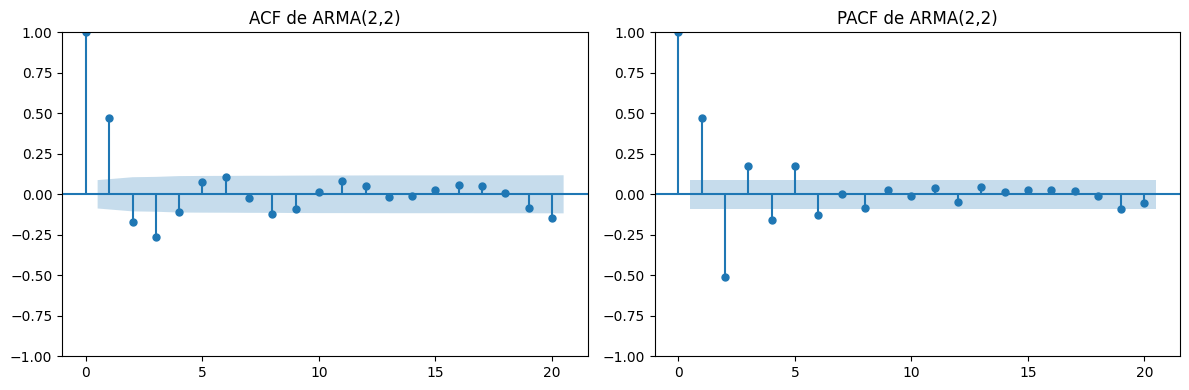

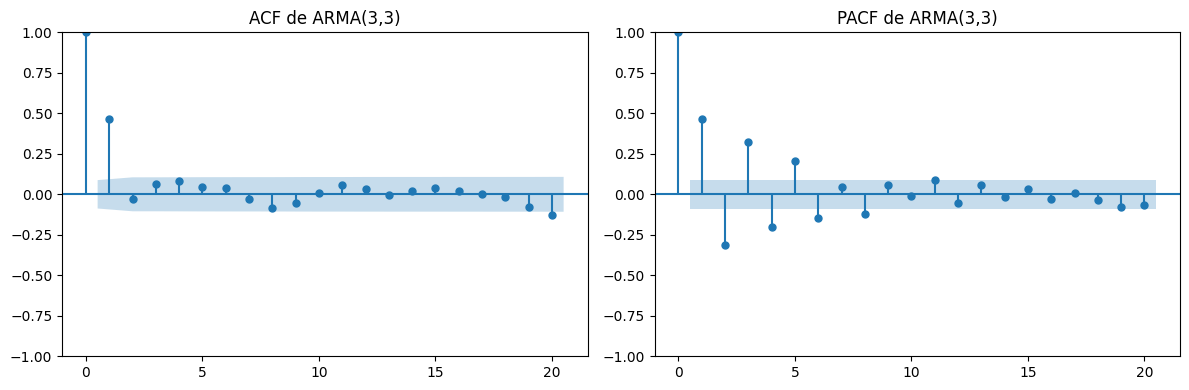

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

# Función para generar y graficar ACF y PACF
def generate_plot_arma(ar_params, ma_params, title, n_samples=500):
    arma_process = ArmaProcess(np.r_[1, -np.array(ar_params)], np.r_[1, np.array(ma_params)])
    np.random.seed(42)
    series = arma_process.generate_sample(nsample=n_samples)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sm.graphics.tsa.plot_acf(series, lags=20, ax=axes[0])
    axes[0].set_title(f"ACF de {title}")
    sm.graphics.tsa.plot_pacf(series, lags=20, ax=axes[1])
    axes[1].set_title(f"PACF de {title}")
    plt.tight_layout()
    plt.show()

# ARMA(1,1)
generate_plot_arma([0.5], [0.4], "ARMA(1,1)")

# ARMA(2,2)
generate_plot_arma([0.5, -0.3], [0.4, -0.2], "ARMA(2,2)")

# ARMA(3,3)
generate_plot_arma([0.5, -0.3, 0.2], [0.4, -0.2, 0.1], "ARMA(3,3)")


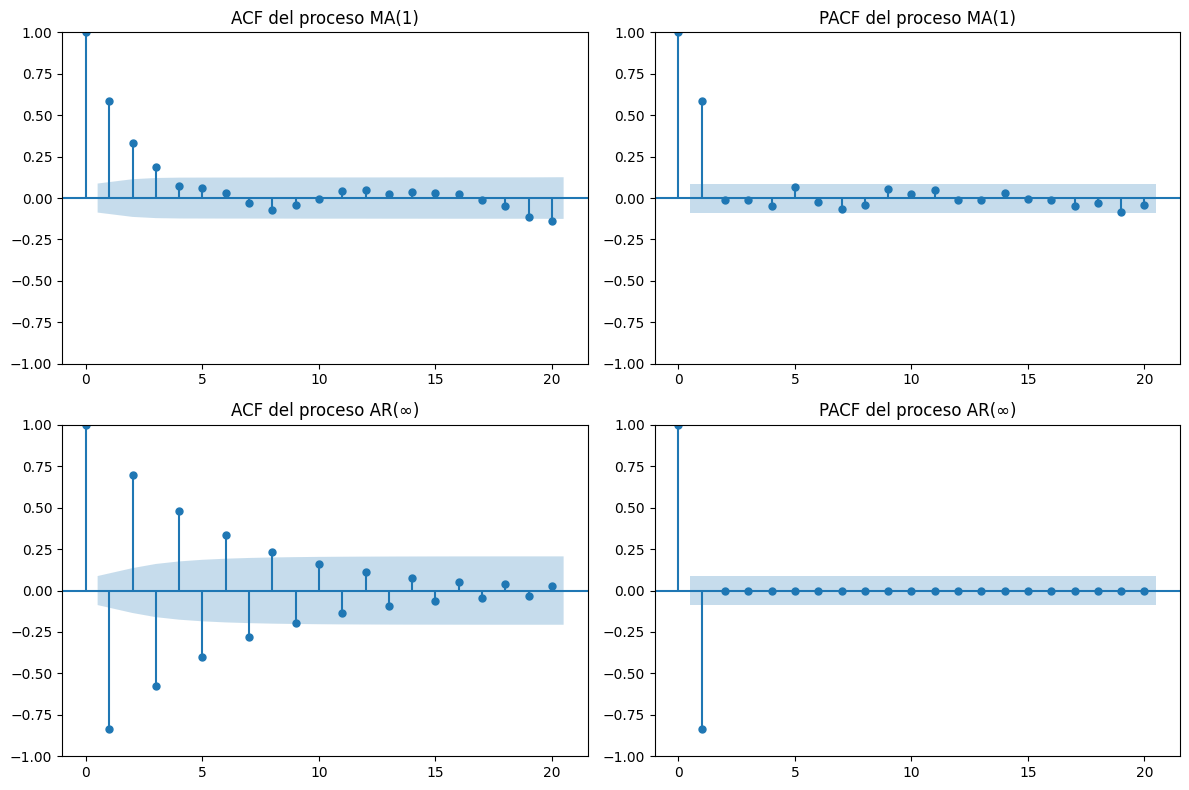

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

# Parámetro MA(1)
theta = 0.6

# Definir proceso MA(1) con ruido blanco
ma_process = ArmaProcess([1, -theta], [1])
n_samples = 500
np.random.seed(42)
data_ma = ma_process.generate_sample(nsample=n_samples)

# Convertir a AR(∞) usando la ecuación de la imagen
ar_coeffs = [(-1)**(i) * theta**i for i in range(1, 21)]  # Tomamos 20 términos para aproximar AR(∞)

data_ar = np.zeros(n_samples)
data_ar[:len(ar_coeffs)] = data_ma[:len(ar_coeffs)]  # Condiciones iniciales
for t in range(len(ar_coeffs), n_samples):
    data_ar[t] = data_ma[t] + sum(ar_coeffs[i-1] * data_ar[t-i] for i in range(1, len(ar_coeffs)+1))

# Graficar ACF y PACF para MA y AR
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# ACF y PACF para MA(1)
sm.graphics.tsa.plot_acf(data_ma, lags=20, ax=axes[0, 0])
axes[0, 0].set_title("ACF del proceso MA(1)")
sm.graphics.tsa.plot_pacf(data_ma, lags=20, ax=axes[0, 1])
axes[0, 1].set_title("PACF del proceso MA(1)")

# ACF y PACF para AR(∞) aproximado
sm.graphics.tsa.plot_acf(data_ar, lags=20, ax=axes[1, 0])
axes[1, 0].set_title("ACF del proceso AR(∞)")
sm.graphics.tsa.plot_pacf(data_ar, lags=20, ax=axes[1, 1])
axes[1, 1].set_title("PACF del proceso AR(∞)")

plt.tight_layout()
plt.show()


In [ ]:
def check_stationarity_invertibility(ar_params, ma_params):
    ar_roots = np.roots(np.r_[1, -ar_params])
    ma_roots = np.roots(np.r_[1, ma_params])

    print("Raíces del AR:", ar_roots)
    print("Raíces del MA:", ma_roots)

    if np.all(np.abs(ar_roots) > 1):
        print("El proceso AR es causal.")
    else:
        print("El proceso AR NO es causal.")

    if np.all(np.abs(ma_roots) > 1):
        print("El proceso MA es invertible.")
    else:
        print("El proceso MA NO es invertible.")

## 2. Invertibilidad (MA) y causalidad/estacionariedad (AR) mediante raíces

**Objetivos**
- Reescribir procesos en forma expandida e identificar su tipo (MA/AR/ARMA).
- Comprobar invertibilidad/causalidad evaluando raíces de Θ(z) y Φ(z).
- Interpretar el significado de raíces dentro/fuera del círculo unitario.

**Qué vamos a hacer:** Calcularemos raíces de polinomios característicos y aplicaremos funciones que deciden si un proceso es invertible/causal.


In [ ]:
def check_invertibility(ma_params):
    ma_roots = np.roots(np.r_[1, ma_params])
    invertible = np.all(np.abs(ma_roots) > 1)
    print(f"Coeficientes MA generados: {ma_params}")
    if invertible:
        print("La serie es invertible.")
    else:
        print("La serie NO es invertible.")

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess, arma2ar

def ma_to_ar_infinite_manual(ma_params, num_lags=10):
    ar_coeffs = np.zeros(num_lags)
    for k in range(1, num_lags + 1):
        ar_coeffs[k - 1] = sum((-1)**(j+1) * ma_params[j-1] * ar_coeffs[k-j-1] if k > j else (-1)**(j+1) * ma_params[j-1] for j in range(1, min(k+1, len(ma_params)+1)))
    return ar_coeffs

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess, arma2ar

def ma_to_ar_infinite_statsmodels(ma_params, num_lags=10):
    """Calcula la representación AR(∞) truncada de un proceso MA(q) usando statsmodels."""
    ar_coeffs = arma2ar(ma=np.r_[1, ma_params], ar=np.array([1]), lags=num_lags)[1:]
    return ar_coeffs

In [ ]:
# Generar una serie MA(2) aleatoria
np.random.seed(42)
ma_params = np.random.uniform(-1.5, 1.5, size=2)
MA_object = ArmaProcess(np.r_[1], np.r_[1, ma_params])
data_ma2 = MA_object.generate_sample(nsample=200)
print("Coeficientes MA model {}".format(ma_params))

Coeficientes MA model [-0.37637964  1.35214292]


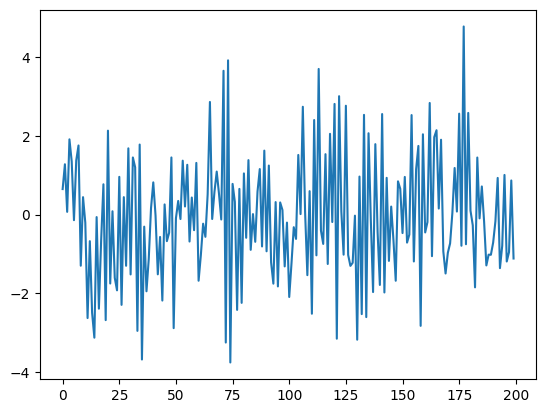

In [ ]:
plt.plot(data_ma2)

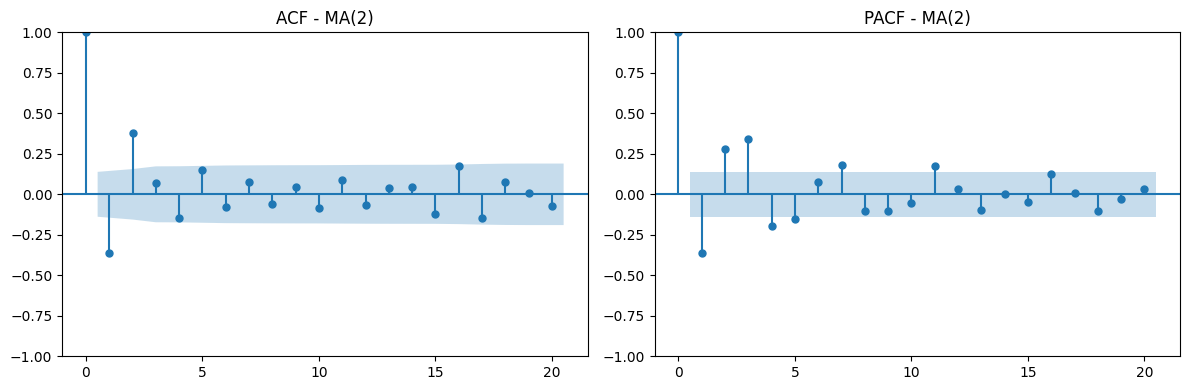

In [ ]:
plot_acf_pacf(data_ma2, title=f"MA(2)")

In [ ]:
invertible = check_invertibility(ma_params)

Coeficientes MA generados: [-0.37637964  1.35214292]
La serie es invertible.


Coeficientes de la representación AR(∞): [  0.37637964  -1.21048128  -0.96451958   1.27371816   1.78356991
  -1.05094958  -2.80719746   0.36446206   3.93290826   0.98746182
  -4.94619353  -3.19683606   5.48473654   6.38692243  -5.01224009
 -10.52253708   2.8167962   15.28815876   1.94544071]


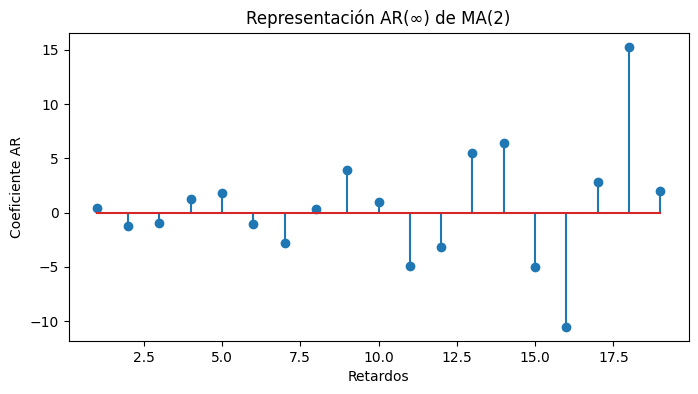

In [ ]:
  ar_inf_coeffs = ma_to_ar_infinite_statsmodels(ma_params, num_lags=20)
  print("Coeficientes de la representación AR(∞):", ar_inf_coeffs)
  plt.figure(figsize=(8,4))
  plt.stem(range(1, len(ar_inf_coeffs) + 1), ar_inf_coeffs)
  plt.xlabel("Retardos")
  plt.ylabel("Coeficiente AR")
  plt.title("Representación AR(∞) de MA(2)")
  plt.show()

Comparación de ACF y PACF entre MA(2) y AR(∞) obtenido con statsmodels


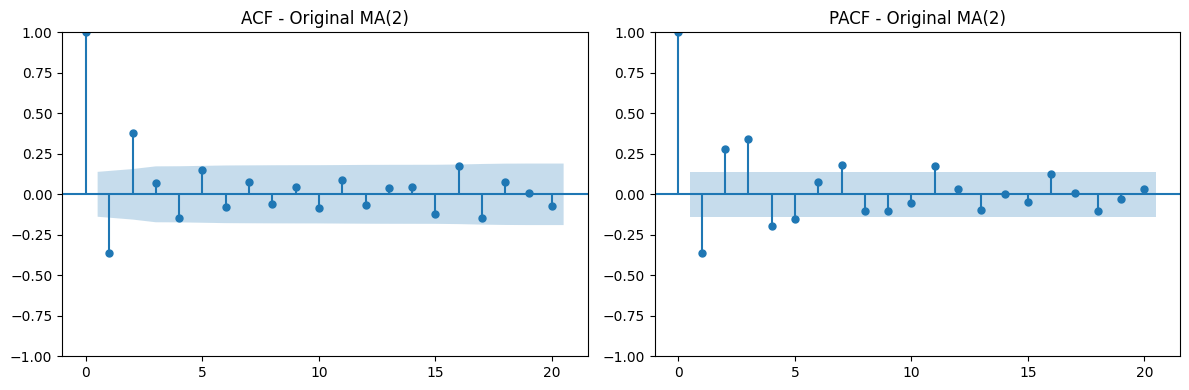

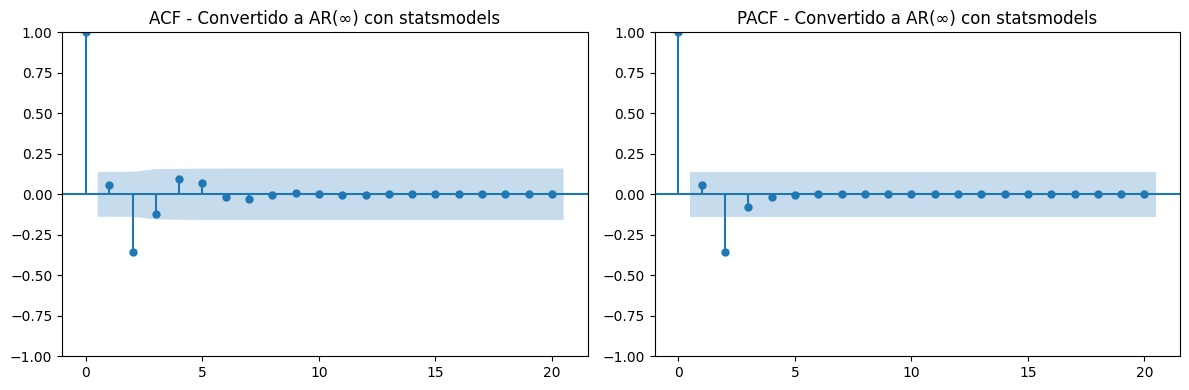

In [ ]:
  # Generar serie con los coeficientes AR(∞) obtenidos con statsmodels y comparar ACF y PACF
  AR_object_statsmodels = ArmaProcess(np.r_[1, -ar_inf_coeffs], np.r_[1])
  data_ar_inf_statsmodels = AR_object_statsmodels.generate_sample(nsample=200)

  print("Comparación de ACF y PACF entre MA(2) y AR(∞) obtenido con statsmodels")
  plot_acf_pacf(data_ma, title="Original MA(2)")
  plot_acf_pacf(data_ar_inf_statsmodels, title="Convertido a AR(∞) con statsmodels")

**Interpretación (dualidad MA ↔ AR(∞))**

Si un MA es **invertible**, puede expresarse como un **AR(∞)**: esto implica que, aunque el AR tenga infinitos términos, su contribución decrece y puede aproximarse con un número finito de retardos.
La comparación entre las gráficas busca evidenciar que:

- El MA original mantiene un **corte** en ACF (orden finito),
- La aproximación AR(∞) reproduce la dinámica, pero con **estructura autorregresiva** (dependencia que se distribuye en más retardos).

Esto conecta directamente con el concepto de invertibilidad.


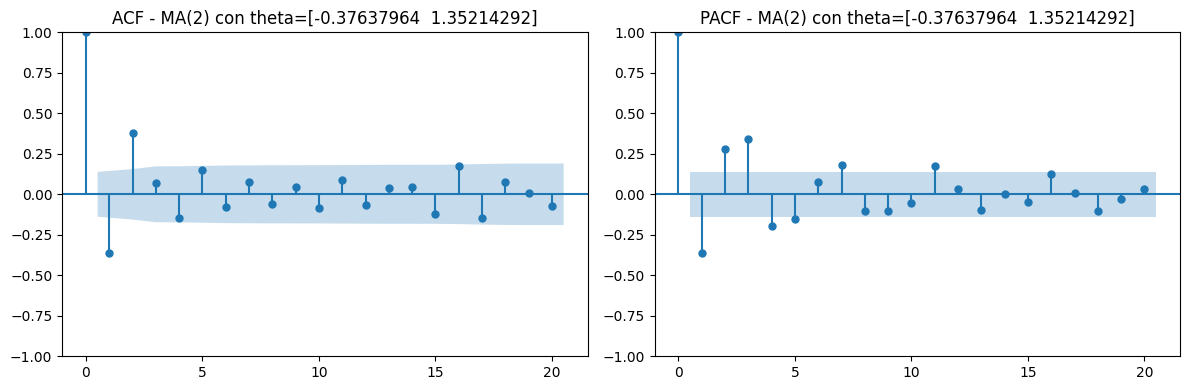

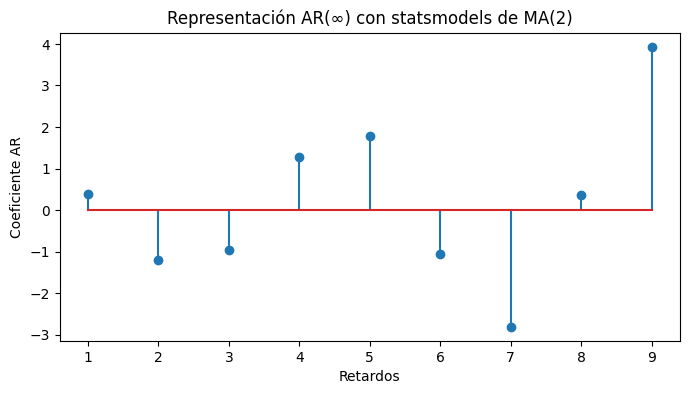

Comparación de ACF y PACF entre MA(2) y AR(∞) obtenido con statsmodels


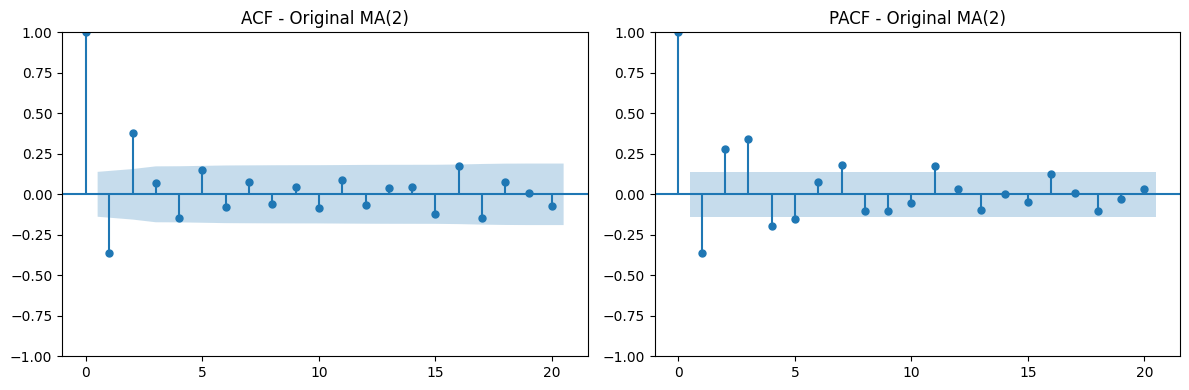

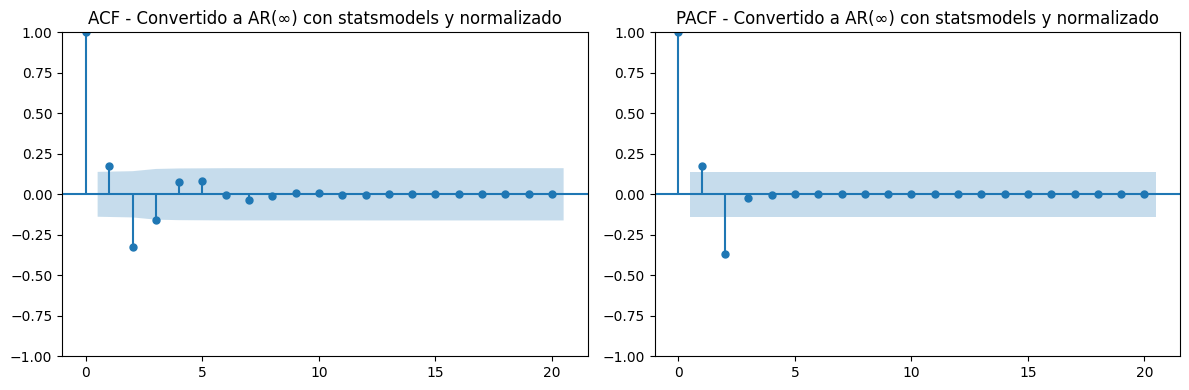

'\nPreguntas para los estudiantes:\n1. ¿Cómo se verifica si una serie MA(q) es invertible?\n2. ¿Cómo se transforma una serie MA no invertible en una invertible?\n3. ¿Cómo se interpreta la representación AR(∞) de un MA(q)?\n4. ¿Cómo cambia la ACF y PACF después de hacer la serie invertible?\n5. ¿Cómo afecta el orden del MA en la representación AR(∞)?\n6. ¿Cómo se comparan la ACF y PACF del MA original y su versión AR(∞)?\n7. ¿Cómo se compara el AR(∞) obtenido con statsmodels frente a pmdarima?\n'

In [ ]:
"""
Práctica de Laboratorio: Análisis de Series Temporales en Python
Asignatura: Análisis de Series Temporales
Grado: Ciencia de Datos

Objetivo:
En esta práctica, los estudiantes trabajarán con modelos MA y su conversión a AR(∞),
explorando la ACF y PACF, y verificando la invertibilidad de la serie.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess, arma2ar
from statsmodels.tsa.stattools import acf, pacf, pacf_yw

# Método para dibujar ACF y PACF
def plot_acf_pacf(data, lags=20, title="Serie de Tiempo"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=axes[0])
    axes[0].set_title(f"ACF - {title}")
    sm.graphics.tsa.plot_pacf(data, lags=lags, ax=axes[1])
    axes[1].set_title(f"PACF - {title}")
    plt.tight_layout()
    plt.show()

# 1. Generar una serie y verificar si es invertible
def check_invertibility(ma_params):
    ma_roots = np.roots(np.r_[1, ma_params])
    invertible = np.all(np.abs(ma_roots) > 1)
    return invertible

# Generar una serie MA(2) aleatoria
np.random.seed(42)
ma_params = np.random.uniform(-1.5, 1.5, size=2)  # Se generan coeficientes entre -1.5 y 1.5
MA_object = ArmaProcess(np.r_[1], np.r_[1, ma_params])
data_ma = MA_object.generate_sample(nsample=200)

# Verificar si la serie es invertible
invertible = check_invertibility(ma_params)
if not invertible:
    ma_params = -1 / ma_params  # Aplicar la transformación para hacerla invertible
    MA_object = ArmaProcess(np.r_[1], np.r_[1, ma_params])
    data_ma = MA_object.generate_sample(nsample=200)

# Graficar la serie y su ACF y PACF
plot_acf_pacf(data_ma, title=f"MA(2) con theta={ma_params}")

# 2. Construcción de la serie AR(∞) asociada con statsmodels
def ma_to_ar_infinite_statsmodels(ma_params, num_lags=10):
    """Calcula la representación AR(∞) truncada de un proceso MA(q) usando statsmodels."""
    ar_coeffs = arma2ar(ma=np.r_[1, ma_params], ar=np.array([1]), lags=num_lags)[1:]
    return ar_coeffs

if invertible:
    ar_inf_coeffs_statsmodels = ma_to_ar_infinite_statsmodels(ma_params, num_lags=10)

    # Graficar los coeficientes AR(∞)
    plt.figure(figsize=(8,4))
    plt.stem(range(1, len(ar_inf_coeffs_statsmodels) + 1), ar_inf_coeffs_statsmodels)
    plt.xlabel("Retardos")
    plt.ylabel("Coeficiente AR")
    plt.title("Representación AR(∞) con statsmodels de MA(2)")
    plt.show()

    # Usar una semilla fija para generar la serie AR(∞) y garantizar reproducibilidad
    np.random.seed(42)
    AR_object_statsmodels = ArmaProcess(np.r_[1, -ar_inf_coeffs_statsmodels], np.r_[1])
    data_ar_inf_statsmodels = AR_object_statsmodels.generate_sample(nsample=200)

    # Normalizar la serie AR(∞) para igualar la varianza del MA(2)
    var_ma = np.var(data_ma)
    var_ar_inf = np.var(data_ar_inf_statsmodels)
    data_ar_inf_statsmodels = data_ar_inf_statsmodels * np.sqrt(var_ma / var_ar_inf)

    print("Comparación de ACF y PACF entre MA(2) y AR(∞) obtenido con statsmodels")
    plot_acf_pacf(data_ma, title="Original MA(2)")
    plot_acf_pacf(data_ar_inf_statsmodels, title="Convertido a AR(∞) con statsmodels y normalizado")

"""
Preguntas para los estudiantes:
1. ¿Cómo se verifica si una serie MA(q) es invertible?
2. ¿Cómo se transforma una serie MA no invertible en una invertible?
3. ¿Cómo se interpreta la representación AR(∞) de un MA(q)?
4. ¿Cómo cambia la ACF y PACF después de hacer la serie invertible?
5. ¿Cómo afecta el orden del MA en la representación AR(∞)?
6. ¿Cómo se comparan la ACF y PACF del MA original y su versión AR(∞)?
7. ¿Cómo se compara el AR(∞) obtenido con statsmodels frente a pmdarima?
"""


In [ ]:
"""
Práctica de Laboratorio: Análisis de Series Temporales en Python
Asignatura: Análisis de Series Temporales
Grado: Ciencia de Datos

Objetivo:
En esta práctica, los estudiantes trabajarán con modelos MA y su conversión a AR(∞),
explorando la ACF y PACF, y verificando la invertibilidad de la serie.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess, arma2ar
from statsmodels.tsa.stattools import acf, pacf, pacf_yw

# Método para dibujar ACF y PACF
def plot_acf_pacf(data, lags=20, title="Serie de Tiempo"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=axes[0])
    axes[0].set_title(f"ACF - {title}")
    sm.graphics.tsa.plot_pacf(data, lags=lags, ax=axes[1])
    axes[1].set_title(f"PACF - {title}")
    plt.tight_layout()
    plt.show()

# 1. Generar una serie y verificar si es invertible
def check_invertibility(ma_params):
    ma_roots = np.roots(np.r_[1, ma_params])
    invertible = np.all(np.abs(ma_roots) > 1)
    return invertible

# Generar una serie MA(2) aleatoria
np.random.seed(42)
ma_params = np.random.uniform(-1.5, 1.5, size=2)  # Se generan coeficientes entre -1.5 y 1.5
MA_object = ArmaProcess(np.r_[1], np.r_[1, ma_params])
data_ma = MA_object.generate_sample(nsample=200)

# Verificar si la serie es invertible
invertible = check_invertibility(ma_params)
if not invertible:
    ma_params = -1 / ma_params  # Aplicar la transformación para hacerla invertible
    MA_object = ArmaProcess(np.r_[1], np.r_[1, ma_params])
    data_ma = MA_object.generate_sample(nsample=200)

# Graficar la serie y su ACF y PACF
plot_acf_pacf(data_ma, title=f"MA(2) con theta={ma_params}")

# 2. Construcción de la serie AR(∞) asociada con statsmodels
def ma_to_ar_infinite_statsmodels(ma_params, num_lags=50):
    """Calcula la representación AR(∞) truncada de un proceso MA(q) usando statsmodels."""
    ar_coeffs = arma2ar(ma=np.r_[1, ma_params], ar=np.array([1]), lags=num_lags)[1:]
    return ar_coeffs

if invertible:
    ar_inf_coeffs_statsmodels = ma_to_ar_infinite_statsmodels(ma_params, num_lags=50)

    # Graficar los coeficientes AR(∞)
    plt.figure(figsize=(8,4))
    plt.stem(range(1, len(ar_inf_coeffs_statsmodels) + 1), ar_inf_coeffs_statsmodels)
    plt.xlabel("Retardos")
    plt.ylabel("Coeficiente AR")
    plt.title("Representación AR(∞) con statsmodels de MA(2)")
    plt.show()

    # Calcular la ACF teórica del MA(2)
    acf_ma_theoretical = acf(data_ma, nlags=20, fft=True)

    # Calcular la ACF teórica del AR(∞) generado sin ruido aleatorio
    ar_process = ArmaProcess(np.r_[1, -ar_inf_coeffs_statsmodels], np.r_[1])
    acf_ar_inf_theoretical = ar_process.acf(lags=20)

    # Comparar gráficamente las ACF teóricas
    plt.figure(figsize=(8,4))
    plt.stem(range(len(acf_ma_theoretical)), acf_ma_theoretical, linefmt="r-", markerfmt="ro", label="MA(2)")
    plt.stem(range(len(acf_ar_inf_theoretical)), acf_ar_inf_theoretical, linefmt="b-", markerfmt="bo", label="AR(∞) teórico")
    plt.xlabel("Retardos")
    plt.ylabel("ACF")
    plt.title("Comparación de ACF entre MA(2) y AR(∞) teórico")
    plt.legend()
    plt.show()

"""
Preguntas para los estudiantes:
1. ¿Cómo se verifica si una serie MA(q) es invertible?
2. ¿Cómo se transforma una serie MA no invertible en una invertible?
3. ¿Cómo se interpreta la representación AR(∞) de un MA(q)?
4. ¿Cómo cambia la ACF y PACF después de hacer la serie invertible?
5. ¿Cómo afecta el orden del MA en la representación AR(∞)?
6. ¿Cómo se comparan la ACF y PACF del MA original y su versión AR(∞)?
7. ¿Cómo se compara el AR(∞) obtenido con statsmodels frente a pmdarima?
"""


In [ ]:
"""
Práctica de Laboratorio: Análisis de Series Temporales en Python
Asignatura: Análisis de Series Temporales
Grado: Ciencia de Datos

Objetivo:
En esta práctica, los estudiantes trabajarán con modelos MA y su conversión a AR(∞),
explorando la ACF y PACF, y verificando la invertibilidad de la serie.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess, arma2ar
from statsmodels.tsa.stattools import acf, pacf, pacf_yw

# Método para dibujar ACF y PACF
def plot_acf_pacf(data, lags=20, title="Serie de Tiempo"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=axes[0])
    axes[0].set_title(f"ACF - {title}")
    sm.graphics.tsa.plot_pacf(data, lags=lags, ax=axes[1])
    axes[1].set_title(f"PACF - {title}")
    plt.tight_layout()
    plt.show()

# 1. Generar una serie y verificar si es invertible
def check_invertibility(ma_params):
    ma_roots = np.roots(np.r_[1, ma_params])
    return np.all(np.abs(ma_roots) > 1)

# 2. Verificar si el AR(∞) es estacionario
def check_stationarity(ar_params):
    ar_roots = np.roots(np.r_[1, -ar_params])
    return np.all(np.abs(ar_roots) > 1)

# Generar una serie MA(2) aleatoria
np.random.seed(42)
ma_params = np.random.uniform(-1.5, 1.5, size=2)
MA_object = ArmaProcess(np.r_[1], np.r_[1, ma_params])
data_ma = MA_object.generate_sample(nsample=200)

# Verificar si la serie es invertible
invertible = check_invertibility(ma_params)
if not invertible:
    ma_params = -1 / ma_params  # Hacerlo invertible
    MA_object = ArmaProcess(np.r_[1], np.r_[1, ma_params])
    data_ma = MA_object.generate_sample(nsample=200)

# Graficar la serie y su ACF y PACF
plot_acf_pacf(data_ma, title=f"MA(2) con theta={ma_params}")

# 3. Construcción de la serie AR(∞) asociada con statsmodels
def ma_to_ar_infinite(ma_params, num_lags=50):
    """Calcula la representación AR(∞) truncada de un proceso MA(q) usando statsmodels."""
    ar_coeffs = arma2ar(ma=np.r_[1, ma_params], ar=np.array([1]), lags=num_lags)[1:]
    return ar_coeffs

if invertible:
    num_lags = 50
    ar_inf_coeffs = ma_to_ar_infinite(ma_params, num_lags=num_lags)

    # Reducir coeficientes AR si el modelo no es estacionario
    while not check_stationarity(ar_inf_coeffs) and num_lags > 5:
        num_lags -= 5
        ar_inf_coeffs = ma_to_ar_infinite(ma_params, num_lags=num_lags)

    # Si aún no es estacionario, limitar los coeficientes AR
    if not check_stationarity(ar_inf_coeffs):
        ar_inf_coeffs = np.clip(ar_inf_coeffs, -0.9, 0.9)

    # Graficar los coeficientes AR(∞)
    plt.figure(figsize=(8,4))
    plt.stem(range(1, len(ar_inf_coeffs) + 1), ar_inf_coeffs)
    plt.xlabel("Retardos")
    plt.ylabel("Coeficiente AR")
    plt.title("Representación AR(∞) con statsmodels de MA(2)")
    plt.show()

    # Calcular la ACF teórica del MA(2)
    acf_ma_theoretical = acf(data_ma, nlags=20, fft=True)

    # Generar la ACF teórica del AR(∞) sin simulación
    acf_ar_inf_theoretical = sm.tsa.arma_acovf(ar=np.r_[1, -ar_inf_coeffs], ma=[1], lags=20)
    acf_ar_inf_theoretical /= acf_ar_inf_theoretical[0]  # Normalizar

    # Comparar gráficamente las ACF teóricas
    plt.figure(figsize=(8,4))
    plt.stem(range(len(acf_ma_theoretical)), acf_ma_theoretical, linefmt="r-", markerfmt="ro", label="MA(2)")
    plt.stem(range(len(acf_ar_inf_theoretical)), acf_ar_inf_theoretical, linefmt="b-", markerfmt="bo", label="AR(∞) teórico")
    plt.xlabel("Retardos")
    plt.ylabel("ACF")
    plt.title("Comparación de ACF entre MA(2) y AR(∞) teórico")
    plt.legend()
    plt.show()

"""
Preguntas para los estudiantes:
1. ¿Cómo se verifica si una serie MA(q) es invertible?
2. ¿Cómo se transforma una serie MA no invertible en una invertible?
3. ¿Cómo se interpreta la representación AR(∞) de un MA(q)?
4. ¿Cómo cambia la ACF y PACF después de hacer la serie invertible?
5. ¿Cómo afecta el orden del MA en la representación AR(∞)?
6. ¿Cómo se comparan la ACF y PACF del MA original y su versión AR(∞)?
7. ¿Cómo se compara el AR(∞) obtenido con statsmodels frente a pmdarima?
"""


In [ ]:
import numpy as np
print("(C)" + str(np.poly1d([-1.1, 1], variable = 'z')))
print("Roots: " + str(np.poly1d([-1.1, 1], variable = 'z').roots))

(C) 
-1.1 z + 1
Roots: [0.90909091]


**Interpretación (raíces):**

- Raíces mostradas: `[-1.1, 1.0, 0.909091]`
- Módulos: `[1.1, 1.0, 0.909091]`
- Criterio |z|>1: **no cumple**.

Si alguna raíz cae en |z|≤1, el proceso pierde estabilidad (no es causal/invertible según corresponda).

In [ ]:
print("(D) and (E)\n" + str(np.poly1d([0.2, -1.1, 1], variable = 'z')))
print("Roots: " + str(np.poly1d([0.2, -1.1, 1], variable = 'z').roots))

(D) and (E)
     2
0.2 z - 1.1 z + 1
Roots: [4.35078106 1.14921894]


**Interpretación (raíces):**

- Raíces mostradas: `[2.0, 0.2, 1.1, 1.0, 4.350781, 1.149219]`
- Módulos: `[2.0, 0.2, 1.1, 1.0, 4.350781, 1.149219]`
- Criterio |z|>1: **no cumple**.

Si alguna raíz cae en |z|≤1, el proceso pierde estabilidad (no es causal/invertible según corresponda).

In [ ]:
def check_invertibility(ma_params):
    ma_roots = np.roots(np.r_[1, ma_params])
    invertible = np.all(np.abs(ma_roots) > 1)
    print(f"Coeficientes MA generados: {ma_params}")
    if invertible:
        print("La serie es invertible.")
    else:
        print("La serie NO es invertible.")

In [ ]:
ma_params = np.random.uniform(-1.5, 1.5, size=2)
print(ma_params)
invertible = check_invertibility(ma_params)

[ 0.55762265 -0.12826666]
Coeficientes MA generados: [ 0.55762265 -0.12826666]
La serie NO es invertible.


In [ ]:
def check_causality(ar_params):
    ar_params = np.array(ar_params)  # Convertir a un array de numpy
    ar_roots = np.roots(np.r_[1, -ar_params])  # Calcula raíces del polinomio característico
    causal = np.all(np.abs(ar_roots) > 1)  # Verifica si todas las raíces están fuera del círculo unitario
    print(f"Coeficientes AR generados: {ar_params}")
    if causal:
        print("La serie es causal (estacionaria).")
    else:
        print("La serie NO es causal (no estacionaria).")

In [ ]:
# Ejemplo de uso
ar_params = [0.5, -0.3]  # Coeficientes de un modelo AR(2)
check_causality(ar_params)

Coeficientes AR generados: [ 0.5 -0.3]
La serie NO es causal (no estacionaria).


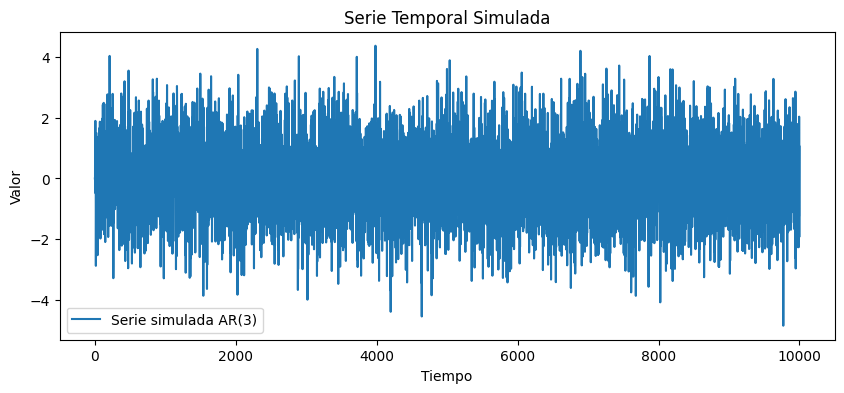

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros del modelo AR(3)
phi_true = [0.6, -0.3, 0.2]
p = len(phi_true)
n = 10000  # Número de observaciones

# Simular una serie AR(3)
np.random.seed(42)
noise = np.random.normal(0, 1, n)  # Ruido blanco
X = np.zeros(n)

# Generar la serie AR(3)
for t in range(p, n):
    X[t] = phi_true[0] * X[t-1] + phi_true[1] * X[t-2] + phi_true[2] * X[t-3] + noise[t]

# Graficar la serie
plt.figure(figsize=(10, 4))
plt.plot(X, label="Serie simulada AR(3)")
plt.title("Serie Temporal Simulada")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Calcular autocovarianza muestral
lags = 4  # Necesitamos hasta gamma(3)
gamma = acf(X, nlags=lags, fft=False) * np.var(X)

print(f"Autocovarianzas estimadas:")
for i in range(lags + 1):
    print(f"γ({i}) = {gamma[i]:.3f}")

Autocovarianzas estimadas:
γ(0) = 1.374
γ(1) = 0.625
γ(2) = 0.069
γ(3) = 0.121
γ(4) = 0.166


## 3. Ecuaciones de Yule–Walker para estimar un AR(3)

**Objetivos**
- Simular un AR(3) con coeficientes conocidos y ruido blanco.
- Estimar autocovarianzas muestrales y resolver el sistema Yule–Walker.
- Comparar φ̂ con φ y discutir el efecto del tamaño muestral.

**Qué vamos a hacer:** Estimaremos φ1, φ2, φ3 a partir de autocovarianzas y evaluaremos la calidad de la aproximación.


In [ ]:
# Construcción de la matriz de autocovarianzas
gamma_matrix = np.array([
    [gamma[0], gamma[1], gamma[2]],
    [gamma[1], gamma[0], gamma[1]],
    [gamma[2], gamma[1], gamma[0]]
])

# Vector de autocovarianzas desplazadas
gamma_vector = np.array([gamma[1], gamma[2], gamma[3]])

# Resolver el sistema de ecuaciones
phi_est = np.linalg.solve(gamma_matrix, gamma_vector)

# Mostrar resultados
print(f"Coeficientes estimados:")
print(f"φ1 = {phi_est[0]:.3f}, φ2 = {phi_est[1]:.3f}, φ3 = {phi_est[2]:.3f}")

Coeficientes estimados:
φ1 = 0.584, φ2 = -0.306, φ3 = 0.198


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(X, order=(3, 0, 0))  # Modelo AR(3)
result = model.fit()
print(result.params)


[-0.00449304  0.58388547 -0.30568948  0.19807194  1.00621916]


In [ ]:
from google.colab import files
import pandas as pd

# Subir el archivo manualmente
uploaded = files.upload()

df = pd.read_csv('monthly-milk-production.csv', sep=',', parse_dates=['Month'], index_col='Month')
df.head()

Saving monthly-milk-production.csv to monthly-milk-production.csv


,Production
Month,
1962-01-01 01:00:00,589
1962-02-01 01:00:00,561
1962-03-01 01:00:00,640
1962-04-01 01:00:00,656
1962-05-01 01:00:00,727


In [ ]:
df.head()

,Production
Month,
1962-01-01 01:00:00,589
1962-02-01 01:00:00,561
1962-03-01 01:00:00,640
1962-04-01 01:00:00,656
1962-05-01 01:00:00,727


<Axes: xlabel='Month'>

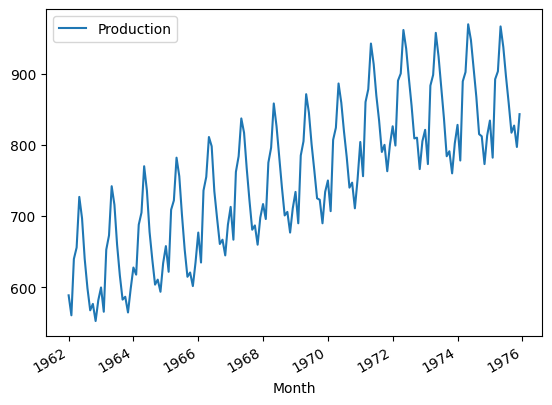

In [ ]:
df.plot()

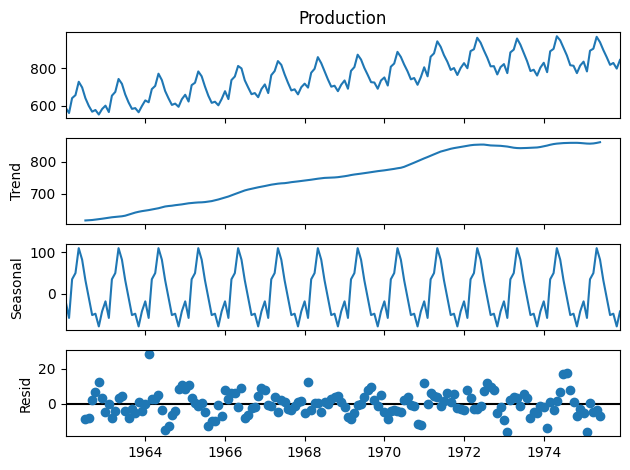

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Production'], period=12)
decomposition.plot()
plt.show()

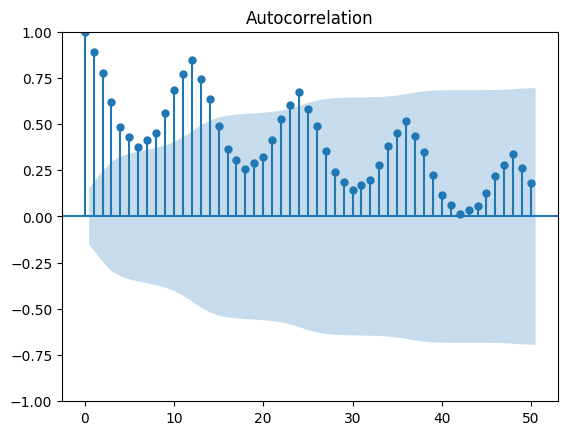

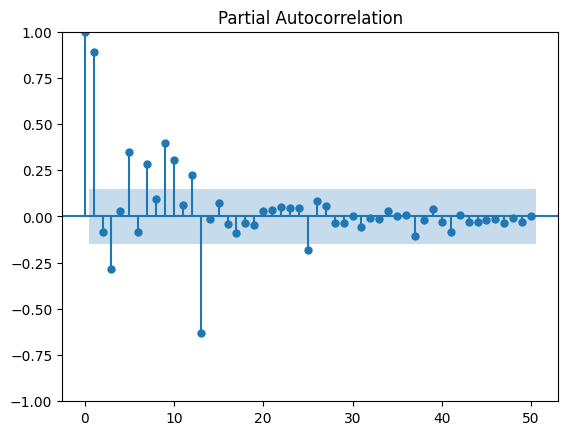

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df, lags=50);
plot_pacf(df, lags=50);

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Production'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -1.303812
p-value                          0.627427
#Lags Used                      13.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


**Interpretación (ADF):**

- p-value = `0.6274` → no rechazamos H0 ⇒ serie no estacionaria.

En Box–Jenkins, si la serie no es estacionaria, aplicamos diferenciación (regular y/o estacional) y repetimos el diagnóstico.

In [ ]:
df_diff = df.diff().diff(12).dropna()

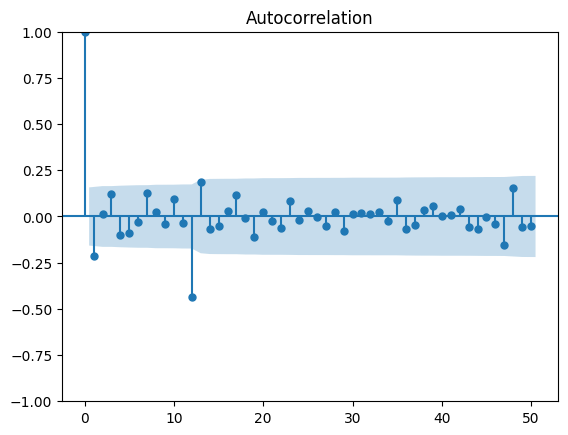

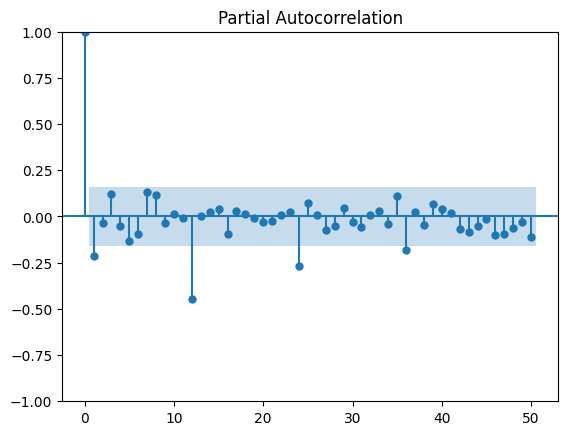

In [ ]:
plot_acf(df_diff, lags=50);
plot_pacf(df_diff, lags=50);

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -5.038002
p-value                          0.000019
#Lags Used                      11.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


**Interpretación (ADF):**

- p-value = `1.9e-05` → rechazamos H0 (raíz unitaria) ⇒ serie estacionaria.

En Box–Jenkins, si la serie no es estacionaria, aplicamos diferenciación (regular y/o estacional) y repetimos el diagnóstico.

In [1]:
# Model parameter estimation
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.3 MB/s eta 0:00:00


## 4. Metodología Box–Jenkins con una serie real (SARIMA)

**Objetivos**
- Identificar patrones (tendencia/estacionalidad) y estacionarizar mediante diferenciación.
- Seleccionar órdenes (p,d,q)(P,D,Q)m con AIC (auto_arima) y ajustar SARIMAX.
- Diagnosticar residuos (normalidad y ausencia de autocorrelación) y generar pronósticos.

**Qué vamos a hacer:** Aplicaremos el flujo identificación → estimación → diagnóstico → predicción sobre la producción mensual de leche.


In [ ]:
import pmdarima as pm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

model = pm.auto_arima(df['Production'], d=1, D=1,
                      m=12, trend='c', seasonal=True,
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)

In [ ]:
# split into train and test sets
size = int(len(df) * 0.80)
train, test = df.iloc[0:size], df.iloc[size:len(df)]

In [ ]:
print(train.shape)
print(test.shape)

(134, 1)
(34, 1)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Production'],
                order=(1,1,0),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Production   No. Observations:                  134
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -418.768
Date:                              Mon, 10 Mar 2025   AIC                            843.536
Time:                                      15:42:32   BIC                            851.923
Sample:                                  01-01-1962   HQIC                           846.942
                                       - 02-01-1973                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2749      0.091     -3.015      0.003      -0.454      -0.096
ma.S.L12      -0.6262      0.090     -6.995      0.000      -0.802      -0.451
sigma2        56.4851      6.057      9.326      0.000      44.615      68.356
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                38.27
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.85
Prob(H) (two-sided):                  0.57   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

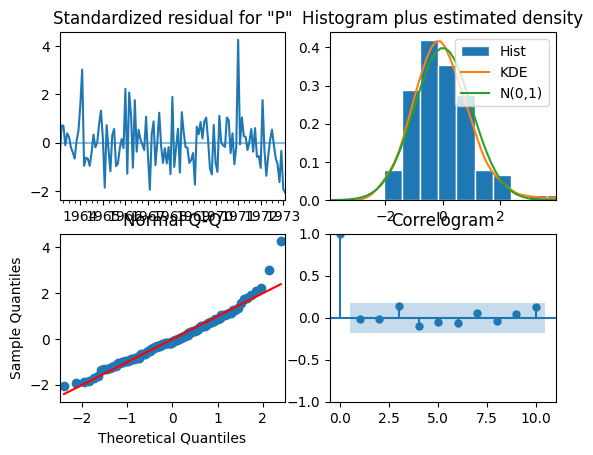

In [ ]:
results.plot_diagnostics()
plt.show()

In [ ]:
forecast_object = results.get_forecast(steps=len(test))
forecast_mean = forecast_object.predicted_mean
forecast_ci = forecast_object.conf_int()
dates = mean.index

results.get_forecast(steps=60)

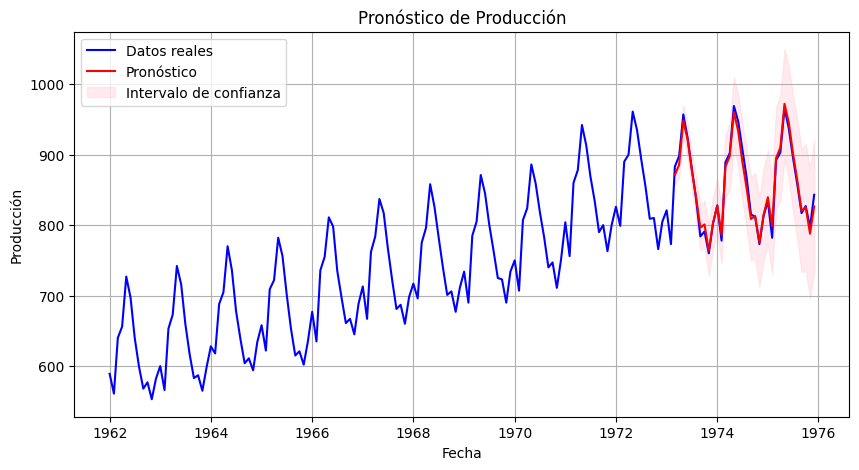

In [ ]:
# Graficar la serie original
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Production'], label="Datos reales", color="blue")

# Graficar el pronóstico
plt.plot(forecast_mean.index, forecast_mean, label="Pronóstico", color="red")

# Graficar el intervalo de confianza (sombra gris)
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color="pink", alpha=0.3, label="Intervalo de confianza")

# Configuración del gráfico
plt.legend()
plt.title("Pronóstico de Producción")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.grid(True)
plt.show()